In [1]:
from utils.epg import *
import matplotlib.pyplot as plt
from copy import copy
cmap = copy(plt.cm.get_cmap("jet"))
from scipy.optimize import least_squares
import numpy

In [2]:
degree = r"${}^{\circ}$"
GeV = "GeV"
GeV2 = "GeV"+r"${}^{2}$"
GeVc = "GeV/c"
GeVc2 = "(GeV/c)"+r"${}^{2}$"

In [3]:
import matplotlib
# initial settings
pgf_with_latex = {
		"pgf.texsystem": "pdflatex",
		"text.usetex": True,            # use LaTeX to write all text
		"font.family": "sans-serif",         
		"font.sans-serif": "Helvetica",
		"font.size": 25,				# default font size
		"axes.labelsize": 24,			# x and y label size
		"axes.titlesize": 24,           # subfigure title size, i.e. title size when one figure
		"legend.fontsize": 12,			# legend size
		"xtick.labelsize": 23,			# x axis tick label size
		"ytick.labelsize": 23,			# y axis tick label 
		"figure.titlesize": 25,         # Figure title size, useful when you have multiple plots in one canvas.
		"pgf.preamble": r"\usepackage{xcolor}"     # xcolor for colours
}
matplotlib.rcParams.update(pgf_with_latex)

In [46]:
expDvcsInb = pd.read_pickle("/Users/sangbaek/Dropbox (MIT)/data/pickles/dvcs_inb.pkl")
# expDvcsOutb = pd.read_pickle("/Users/sangbaek/Dropbox (MIT)/data/pickles/dvcs_outb.pkl")

In [59]:
expDvcsInbCD = pd.read_pickle("/Users/sangbaek/Dropbox (MIT)/data/pickles/dvcs_inb_CD.pkl")


In [4]:
job2942_0 = pd.read_pickle("/Users/sangbaek/Dropbox (MIT)/data/pickles/2942_0.pkl")
job2942_1 = pd.read_pickle("/Users/sangbaek/Dropbox (MIT)/data/pickles/2942_1.pkl")
job2942_2 = pd.read_pickle("/Users/sangbaek/Dropbox (MIT)/data/pickles/2942_2.pkl")
job2942_3 = pd.read_pickle("/Users/sangbaek/Dropbox (MIT)/data/pickles/2942_3.pkl")
job2942_4 = pd.read_pickle("/Users/sangbaek/Dropbox (MIT)/data/pickles/2942_4.pkl")
job2942_5 = pd.read_pickle("/Users/sangbaek/Dropbox (MIT)/data/pickles/2942_5.pkl")
job2942_6 = pd.read_pickle("/Users/sangbaek/Dropbox (MIT)/data/pickles/2942_6.pkl")
job2942_7 = pd.read_pickle("/Users/sangbaek/Dropbox (MIT)/data/pickles/2942_7.pkl")
job2942_8 = pd.read_pickle("/Users/sangbaek/Dropbox (MIT)/data/pickles/2942_8.pkl")
job2942_9 = pd.read_pickle("/Users/sangbaek/Dropbox (MIT)/data/pickles/2942_9.pkl")

In [7]:
job2942_0_gen = pd.read_pickle("/Users/sangbaek/Dropbox (MIT)/data/pickles/2942_0.gen.pkl")
job2942_1_gen = pd.read_pickle("/Users/sangbaek/Dropbox (MIT)/data/pickles/2942_1.gen.pkl")
job2942_2_gen = pd.read_pickle("/Users/sangbaek/Dropbox (MIT)/data/pickles/2942_2.gen.pkl")
job2942_3_gen = pd.read_pickle("/Users/sangbaek/Dropbox (MIT)/data/pickles/2942_3.gen.pkl")
job2942_4_gen = pd.read_pickle("/Users/sangbaek/Dropbox (MIT)/data/pickles/2942_4.gen.pkl")
job2942_5_gen = pd.read_pickle("/Users/sangbaek/Dropbox (MIT)/data/pickles/2942_5.gen.pkl")
job2942_6_gen = pd.read_pickle("/Users/sangbaek/Dropbox (MIT)/data/pickles/2942_6.gen.pkl")
job2942_7_gen = pd.read_pickle("/Users/sangbaek/Dropbox (MIT)/data/pickles/2942_7.gen.pkl")
job2942_8_gen = pd.read_pickle("/Users/sangbaek/Dropbox (MIT)/data/pickles/2942_8.gen.pkl")
job2942_9_gen = pd.read_pickle("/Users/sangbaek/Dropbox (MIT)/data/pickles/2942_9.gen.pkl")

In [5]:
pi02epg_0 = pd.read_pickle("/Users/sangbaek/Dropbox (MIT)/data/pickles/pi02epg2_0.pkl")
pi02epg_1 = pd.read_pickle("/Users/sangbaek/Dropbox (MIT)/data/pickles/pi02epg2_1.pkl")
pi02epg_2 = pd.read_pickle("/Users/sangbaek/Dropbox (MIT)/data/pickles/pi02epg2_2.pkl")
pi02epg_3 = pd.read_pickle("/Users/sangbaek/Dropbox (MIT)/data/pickles/pi02epg2_3.pkl")
pi02epg_4 = pd.read_pickle("/Users/sangbaek/Dropbox (MIT)/data/pickles/pi02epg2_4.pkl")
pi02epg_5 = pd.read_pickle("/Users/sangbaek/Dropbox (MIT)/data/pickles/pi02epg2_5.pkl")
pi02epg_6 = pd.read_pickle("/Users/sangbaek/Dropbox (MIT)/data/pickles/pi02epg2_6.pkl")
pi02epg_7 = pd.read_pickle("/Users/sangbaek/Dropbox (MIT)/data/pickles/pi02epg2_7.pkl")
pi02epg_8 = pd.read_pickle("/Users/sangbaek/Dropbox (MIT)/data/pickles/pi02epg2_8.pkl")
pi02epg_9 = pd.read_pickle("/Users/sangbaek/Dropbox (MIT)/data/pickles/pi02epg2_9.pkl")
pi02epg_10 = pd.read_pickle("/Users/sangbaek/Dropbox (MIT)/data/pickles/pi02epg2_10.pkl")
pi02epg_11 = pd.read_pickle("/Users/sangbaek/Dropbox (MIT)/data/pickles/pi02epg2_11.pkl")
pi02epg_12 = pd.read_pickle("/Users/sangbaek/Dropbox (MIT)/data/pickles/pi02epg2_12.pkl")
pi02epg_13 = pd.read_pickle("/Users/sangbaek/Dropbox (MIT)/data/pickles/pi02epg2_13.pkl")
pi02epg_14 = pd.read_pickle("/Users/sangbaek/Dropbox (MIT)/data/pickles/pi02epg2_14.pkl")
pi02epg_15 = pd.read_pickle("/Users/sangbaek/Dropbox (MIT)/data/pickles/pi02epg2_15.pkl")

In [6]:
pi02epgg = pd.read_pickle("/Users/sangbaek/Dropbox (MIT)/data/pickles/pi02epgg2.pkl")

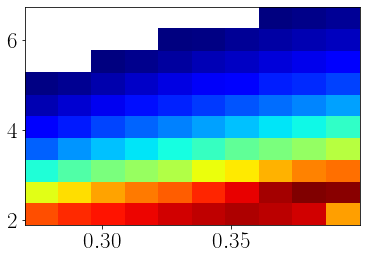

In [25]:
plt.hist2d(pi02epgg.GenxB, pi02epgg.GenQ2, cmap = cmap, cmin = 1)
plt.show()

In [83]:
def dfInOneBin(df):
    binQ2lower = df["Q2"] > 2.2
    binQ2upper = df["Q2"] < 2.7
    binxBlower = df["xB"] > 0.29
    binxBupper = df["xB"] < 0.32
    if "t2" in df.columns:
        bintlower = df["t2"] > 0.3
        bintupper = df["t2"] < 0.39
    else:
        bintlower = df["t"] > 0.3
        bintupper = df["t"] < 0.39
    return df[binQ2lower & binQ2upper &
              binxBlower & binxBupper & bintlower & bintupper]

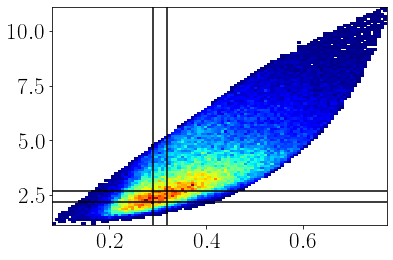

In [103]:
plt.hist2d(expDvcsInb.xB, expDvcsInb.Q2, cmin = 1, cmap = cmap, bins = 101)
plt.axvline(0.29, color='k')
plt.axvline(0.32, color='k')
plt.axhline(2.2, color='k')
plt.axhline(2.7, color='k')
plt.show()

<AxesSubplot:>

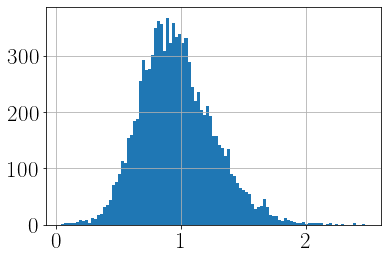

In [43]:
np.sqrt(pro_ME**2-mag(pro_M)).hist(bins = 101)

In [8]:
# dvcs_rec_entire = pd.concat([df for df in [job2942_0, job2942_1, job2942_2, job2942_3, job2942_4, job2942_5, job2942_6, job2942_7, job2942_8, job2942_9]])
# dvcs_gen_entire = pd.concat([df for df in [job2942_0_gen, job2942_1_gen, job2942_2_gen, job2942_3_gen, job2942_4_gen, job2942_5_gen, job2942_6_gen, job2942_7_gen, job2942_8_gen, job2942_9_gen]])

In [ ]:
import gc
del job2942_0
del job2942_1
del job2942_2
del job2942_3
del job2942_4
del job2942_5
del job2942_6
del job2942_7
del job2942_8
del job2942_9
# del job2942_0_gen
# del job2942_1_gen
# del job2942_2_gen
# del job2942_3_gen
# del job2942_4_gen
# del job2942_5_gen
# del job2942_6_gen
# del job2942_7_gen
# del job2942_8_gen
# del job2942_9_gen
gc.collect()

In [7]:
pi02epg = pd.concat([df for df in [pi02epg_0, pi02epg_1, pi02epg_2, pi02epg_3, pi02epg_4, pi02epg_5, pi02epg_6, pi02epg_7, pi02epg_8, pi02epg_9, pi02epg_10, pi02epg_11, pi02epg_12, pi02epg_13, pi02epg_14]])

In [32]:
expPi0Inb = pd.read_pickle("/Users/sangbaek/Dropbox (MIT)/data/pickles/pi0_inb.pkl")

In [ ]:
del pi02epg_0
del pi02epg_1
del pi02epg_2
del pi02epg_3
del pi02epg_4
del pi02epg_5
del pi02epg_6
del pi02epg_7
del pi02epg_8
del pi02epg_9
del pi02epg_10
del pi02epg_11
del pi02epg_12
del pi02epg_13
del pi02epg_14
del pi02epg_15
gc.collect()

In [67]:
pi02epg.loc[:, "GenGpx2"] = - pi02epg.GenEpx - pi02epg.GenPpx - pi02epg.GenGpx
pi02epg.loc[:, "GenGpy2"] = - pi02epg.GenEpy - pi02epg.GenPpy - pi02epg.GenGpy
pi02epg.loc[:, "GenGpz2"] = 10.6 - pi02epg.GenEpz - pi02epg.GenPpz - pi02epg.GenGpz
pi02epg.loc[:, "GenGp2"] = mag([pi02epg.GenGpx2, pi02epg.GenGpy2, pi02epg.GenGpz2])

In [79]:
df_gammaGencopy = copy(pi02epg)
df_gammaGencopy.loc[:, "GenGp"] = np.where(pi02epg["GenGp"]>pi02epg["GenGp2"], pi02epg.loc[:, "GenGp"], pi02epg.loc[:, "GenGp2"])
df_gammaGencopy.loc[:, "GenGpx"] = np.where(pi02epg["GenGp"]>pi02epg["GenGp2"], pi02epg.loc[:, "GenGpx"], pi02epg.loc[:, "GenGpx2"])
df_gammaGencopy.loc[:, "GenGpy"] = np.where(pi02epg["GenGp"]>pi02epg["GenGp2"], pi02epg.loc[:, "GenGpy"], pi02epg.loc[:, "GenGpy2"])
df_gammaGencopy.loc[:, "GenGpz"] = np.where(pi02epg["GenGp"]>pi02epg["GenGp2"], pi02epg.loc[:, "GenGpz"], pi02epg.loc[:, "GenGpz2"])
df_gammaGencopy.loc[:, "GenGp2"] = np.where(pi02epg["GenGp"]>pi02epg["GenGp2"], pi02epg.loc[:, "GenGp2"], pi02epg.loc[:, "GenGp"])
df_gammaGencopy.loc[:, "GenGpx2"] = np.where(pi02epg["GenGp"]>pi02epg["GenGp2"], pi02epg.loc[:, "GenGpx2"], pi02epg.loc[:, "GenGpx"])
df_gammaGencopy.loc[:, "GenGpy2"] = np.where(pi02epg["GenGp"]>pi02epg["GenGp2"], pi02epg.loc[:, "GenGpy2"], pi02epg.loc[:, "GenGpy"])
df_gammaGencopy.loc[:, "GenGpz2"] = np.where(pi02epg["GenGp"]>pi02epg["GenGp2"], pi02epg.loc[:, "GenGpz2"], pi02epg.loc[:, "GenGpz"])
pi02epg = df_gammaGencopy

Gengam2 = [pi02epg.GenGpx2, pi02epg.GenGpy2, pi02epg.GenGpz2]

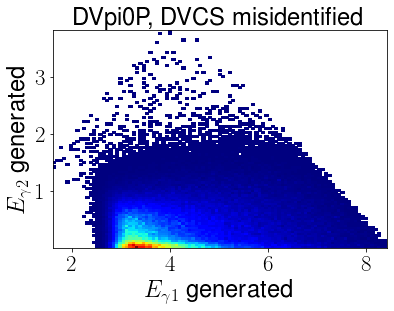

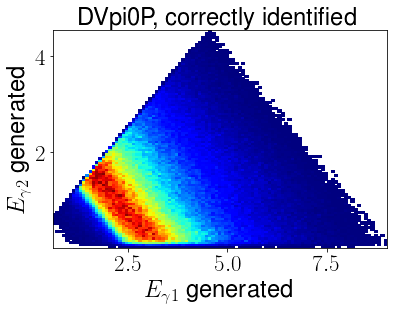

In [94]:
plt.hist2d(pi02epg.GenGp, pi02epg.GenGp2, cmap = cmap, cmin = 1, bins = 101)
plt.title("DVpi0P, DVCS misidentified")
plt.xlabel(r"$E_{\gamma 1}$"+" generated")
plt.ylabel(r"$E_{\gamma 2}$"+" generated")
plt.show()

plt.hist2d(pi02epgg.GenGp, pi02epgg.GenGp2, cmap = cmap, cmin = 1, bins = 101)
plt.title("DVpi0P, correctly identified")
plt.xlabel(r"$E_{\gamma 1}$"+" generated")
plt.ylabel(r"$E_{\gamma 2}$"+" generated")
plt.show()

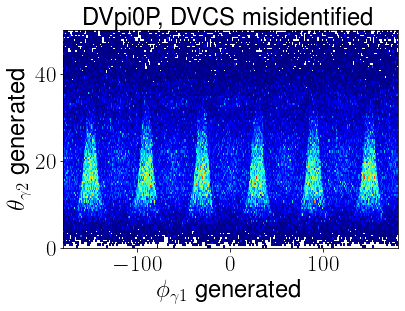

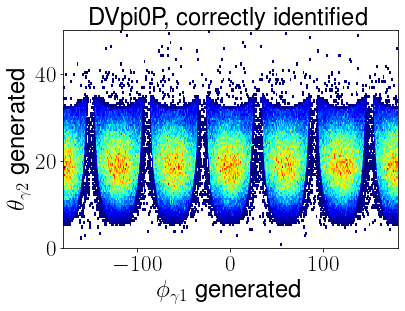

In [96]:
plt.hist2d(getPhi(Gengam2), getTheta(Gengam2), bins = [np.linspace(-180, 180, 361), np.linspace(0, 50, 101)], cmap = cmap, cmin = 1)
plt.title("DVpi0P, DVCS misidentified")
plt.xlabel(r"$\phi_{\gamma 1}$"+" generated")
plt.ylabel(r"$\theta_{\gamma 2}$"+" generated")
plt.show()

GenGam2 = [pi02epgg.GenGpx2, pi02epgg.GenGpy2, pi02epgg.GenGpz2]

plt.hist2d(getPhi(GenGam2), getTheta(GenGam2), bins = [np.linspace(-180, 180, 361), np.linspace(0, 50, 101)], cmap = cmap, cmin = 1)
plt.title("DVpi0P, correctly identified")
plt.xlabel(r"$\phi_{\gamma 1}$"+" generated")
plt.ylabel(r"$\theta_{\gamma 2}$"+" generated")
plt.show()

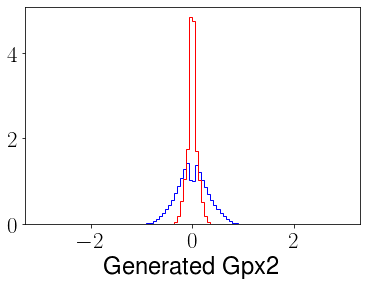

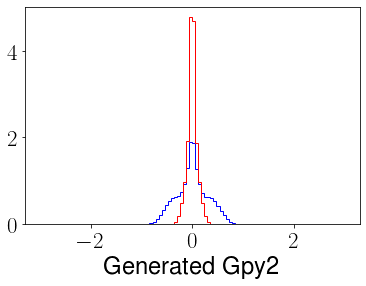

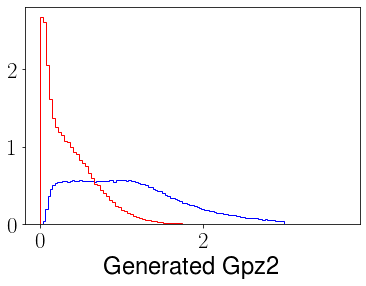

In [98]:
plt.hist(pi02epgg.GenGpx2, bins = np.linspace(-3, 3, 101), histtype = 'step', density =True, edgecolor='b')
plt.hist(pi02epg.GenGpx2, bins = np.linspace(-3, 3, 101), histtype = 'step', density =True, edgecolor='r')
plt.xlabel("Generated Gpx2")
plt.show()

plt.hist(pi02epgg.GenGpy2, bins = np.linspace(-3, 3, 101), histtype = 'step', density =True, edgecolor='b')
plt.hist(pi02epg.GenGpy2, bins = np.linspace(-3, 3, 101), histtype = 'step', density =True, edgecolor='r')
plt.xlabel("Generated Gpy2")
plt.show()

plt.hist(pi02epgg.GenGpz2, bins = np.linspace(0, 3, 101), histtype = 'step', density =True, edgecolor='b')
plt.hist(pi02epg.GenGpz2, bins = 101, histtype = 'step',  edgecolor='r', density = True)
plt.xlabel("Generated Gpz2")
plt.show()

In [11]:
VGS = [-pi02epgg['Epx'], -pi02epgg['Epy'], pbeam - pi02epgg['Epz']]
ele = [pi02epgg['Epx'], pi02epgg['Epy'], pi02epgg['Epz']]
pro = [pi02epgg['Ppx'], pi02epgg['Ppy'], pi02epgg['Ppz']]
gam = [pi02epgg['Gpx'], pi02epgg['Gpy'], pi02epgg['Gpz']]
costheta = cosTheta(VGS, gam)
v3l = cross(beam, ele)
v3h = cross(pro, VGS)
v3g = cross(VGS, gam)
pi02epgg.loc[:,'phi2'] = angle(v3l, v3g)
pi02epgg.loc[:,'phi2'] = np.where(dot(v3l, gam) <
                          0, 360.0 - pi02epgg['phi2'], pi02epgg['phi2'])

pi02epgg.loc[:,'t2'] = (M * pi02epgg['Q2'] + 2 * M * pi02epgg['nu'] * (pi02epgg['nu'] - np.sqrt(pi02epgg['nu'] * pi02epgg['nu'] + pi02epgg['Q2']) * costheta))\
/ (M + pi02epgg['nu'] - np.sqrt(pi02epgg['nu'] * pi02epgg['nu'] + pi02epgg['Q2']) * costheta)


<AxesSubplot:>

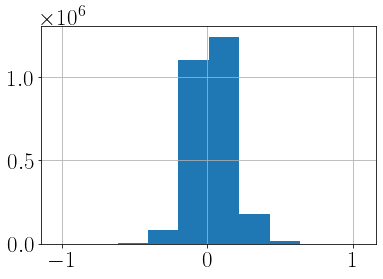

In [13]:
(pi02epgg.t2-pi02epgg.t).hist()

<AxesSubplot:>

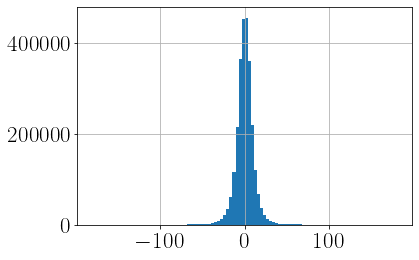

In [17]:
(pi02epgg.phi2-pi02epgg.phi1).hist(bins = np.linspace(-180, 180, 101))

In [28]:
df_epg = copy(pi02epgg[pi02epgg.Ge>3])
ele = [df_epg['Epx'], df_epg['Epy'], df_epg['Epz']]
df_epg.loc[:, 'Ep'] = mag(ele)
df_epg.loc[:, 'Ee'] = getEnergy(ele, me)
df_epg.loc[:, 'Etheta'] = getTheta(ele)
df_epg.loc[:, 'Ephi'] = getPhi(ele)

pro = [df_epg['Ppx'], df_epg['Ppy'], df_epg['Ppz']]

gam = [df_epg['Gpx'], df_epg['Gpy'], df_epg['Gpz']]
df_epg.loc[:, 'Gp'] = mag(gam)
df_epg.loc[:, 'Ge'] = getEnergy(gam, 0)
df_epg.loc[:, 'Gtheta'] = getTheta(gam)
df_epg.loc[:, 'Gphi'] = getPhi(gam)

Ppt = mag([df_epg['Ppx'], df_epg['Ppy'], 0])

VGS = [-df_epg['Epx'], -df_epg['Epy'], pbeam - df_epg['Epz']]
v3l = cross(beam, ele)
v3h = cross(pro, VGS)
v3g = cross(VGS, gam)
VmissG = [-df_epg["Epx"] - df_epg["Ppx"], -df_epg["Epy"] - df_epg["Ppy"],
          pbeam - df_epg["Epz"] - df_epg["Ppz"]]
VmissP = [-(df_epg["Epx"] + df_epg["Gpx"]), -(df_epg["Epy"] + df_epg["Gpy"]),
          -(-pbeam + df_epg["Epz"] + df_epg["Gpz"])]
Vmiss = [-(df_epg["Epx"] + df_epg["Ppx"] + df_epg["Gpx"]), -(df_epg["Epy"] + df_epg["Ppy"] + df_epg["Gpy"]),
         -(-pbeam + df_epg["Epz"] + df_epg["Ppz"] + df_epg["Gpz"])]
costheta = cosTheta(VGS, gam)

df_epg.loc[:, 'Mpx'], df_epg.loc[:, 'Mpy'], df_epg.loc[:, 'Mpz'] = Vmiss

# binning kinematics
df_epg.loc[:,'Q2'] = -((ebeam - df_epg['Ee'])**2 - mag2(VGS))
df_epg.loc[:,'nu'] = (ebeam - df_epg['Ee'])
df_epg.loc[:,'y'] = df_epg['nu']/ebeam
df_epg.loc[:,'xB'] = df_epg['Q2'] / 2.0 / M / df_epg['nu']
df_epg.loc[:,'t1'] = 2 * M * (df_epg['Pe'] - M)
df_epg.loc[:,'t2'] = (M * df_epg['Q2'] + 2 * M * df_epg['nu'] * (df_epg['nu'] - np.sqrt(df_epg['nu'] * df_epg['nu'] + df_epg['Q2']) * costheta))\
/ (M + df_epg['nu'] - np.sqrt(df_epg['nu'] * df_epg['nu'] + df_epg['Q2']) * costheta)
df_epg.loc[:,'W'] = np.sqrt(np.maximum(0, (ebeam + M - df_epg['Ee'])**2 - mag2(VGS)))

# trento angles
df_epg.loc[:,'phi1'] = angle(v3l, v3h)
df_epg.loc[:,'phi1'] = np.where(dot(v3l, pro) > 0, 360.0 -
                          df_epg['phi1'], df_epg['phi1'])
df_epg.loc[:,'phi2'] = angle(v3l, v3g)
df_epg.loc[:,'phi2'] = np.where(dot(v3l, gam) <
                          0, 360.0 - df_epg['phi2'], df_epg['phi2'])

# exclusivity variables
df_epg.loc[:,'MM2_epg'] = (-M - ebeam + df_epg["Ee"] +
                     df_epg["Pe"] + df_epg["Ge"])**2 - mag2(Vmiss)
df_epg.loc[:,'ME_epg'] = (M + ebeam - df_epg["Ee"] - df_epg["Pe"] - df_epg["Ge"])
df_epg.loc[:,'MM2_ep'] = (-M - ebeam + df_epg["Ee"] + df_epg["Pe"])**2 - mag2(VmissG)
df_epg.loc[:,'MM2_eg'] = (-M - ebeam + df_epg["Ee"] + df_epg["Ge"])**2 - mag2(VmissP)
df_epg.loc[:,'MPt'] = np.sqrt((df_epg["Epx"] + df_epg["Ppx"] + df_epg["Gpx"])**2 +
                        (df_epg["Epy"] + df_epg["Ppy"] + df_epg["Gpy"])**2)
df_epg.loc[:,'coneAngle'] = angle(ele, gam)
df_epg.loc[:,'reconGam'] = angle(gam, VmissG)
df_epg.loc[:,'coplanarity'] = angle(v3h, v3g)

df_dvcs = copy(df_epg)
df_dvcs = df_dvcs[df_dvcs["MM2_eg"] > 0]  # mmeg

cut_xBupper = df_dvcs["xB"] < 1  # xB
cut_xBlower = df_dvcs["xB"] > 0  # xB
cut_Q2 = df_dvcs["Q2"] > 1  # Q2
cut_W = df_dvcs["W"] > 2  # W
cut_Ee = df_dvcs["Ee"] > 2  # Ee
cut_Ge = df_dvcs["Ge"] > 3  # Ge
cut_Pp = mag([df_dvcs["Ppx"], df_dvcs["Ppy"], df_dvcs["Ppz"]]) > 0.12  # Pp
cut_Vz = 1#np.abs(df_dvcs["Evz"] - df_dvcs["Pvz"]) < 2.5 + 2.5 / mag([df_dvcs["Ppx"], df_dvcs["Ppy"], df_dvcs["Ppz"]])

#   Exclusivity cuts
cut_mmepg = np.abs(df_dvcs["MM2_epg"]) < 0.1  # mmepg
cut_mmep = np.abs(df_dvcs["MM2_ep"]) < 0.6  # mmep
cut_mmegupper = df_dvcs["MM2_eg"] < 3  # mmeg
cut_mmeglower = df_dvcs["MM2_eg"] > 0  # mmeg
cut_meepgupper = df_dvcs["ME_epg"] < 1.5  # meepg
cut_meepglower = df_dvcs["ME_epg"] > -0.5  # meepg
cut_mpt = df_dvcs["MPt"] < 0.25  # mpt
cut_cone = df_dvcs["coneAngle"] > 5  # coneangle
cut_recon = df_dvcs["reconGam"] < 2.5  # recon gam angle
cut_coplanarity = df_dvcs["coplanarity"] < 25  # coplanarity angle
if "Esector" in df_dvcs:
    cut_sector = df_dvcs["Esector"]!=df_dvcs["Gsector"]
else:
    cut_sector = 1

df_dvcs = df_dvcs[cut_xBupper & cut_xBlower & cut_Q2 & cut_W & cut_Ee & cut_Ge & cut_Pp & cut_Vz & cut_mmepg & cut_mmep &
                 cut_mmegupper & cut_mmeglower & cut_meepgupper & cut_meepglower & cut_mpt & cut_cone & cut_recon & cut_sector]

#dealing with duplicates
df_dvcs = df_dvcs.sort_values(by='Ge', ascending = False)
df_dvcs = df_dvcs.loc[~df_dvcs.event.duplicated(), :]
df_dvcs = df_dvcs.sort_values(by='event')

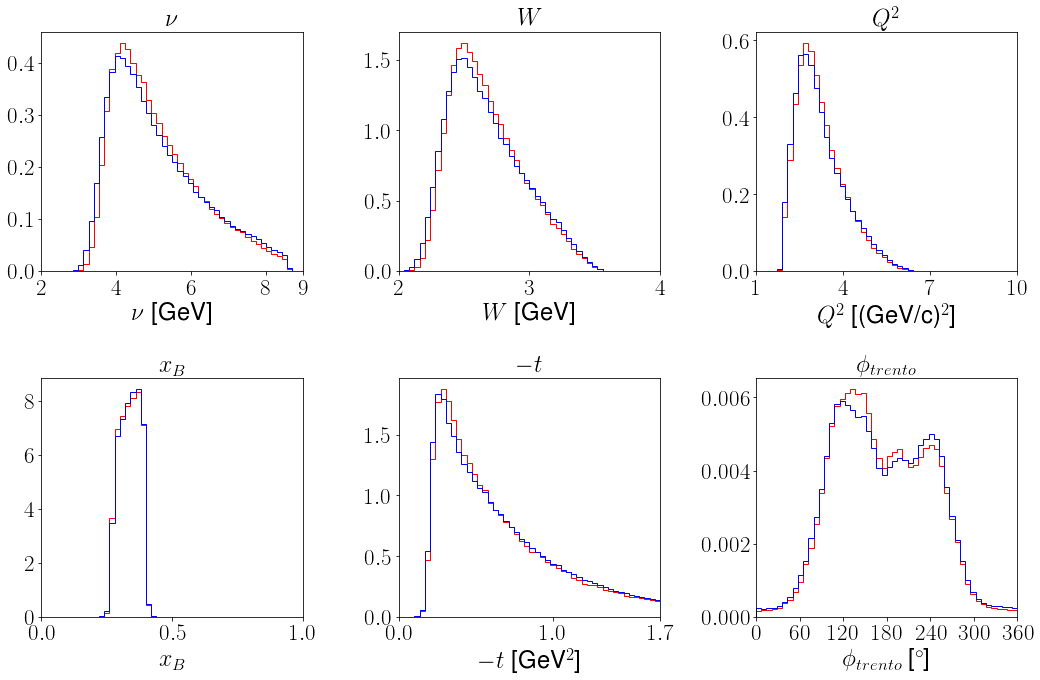

<Figure size 432x288 with 0 Axes>

In [29]:
drawKine(df_dvcs, pi02epg)

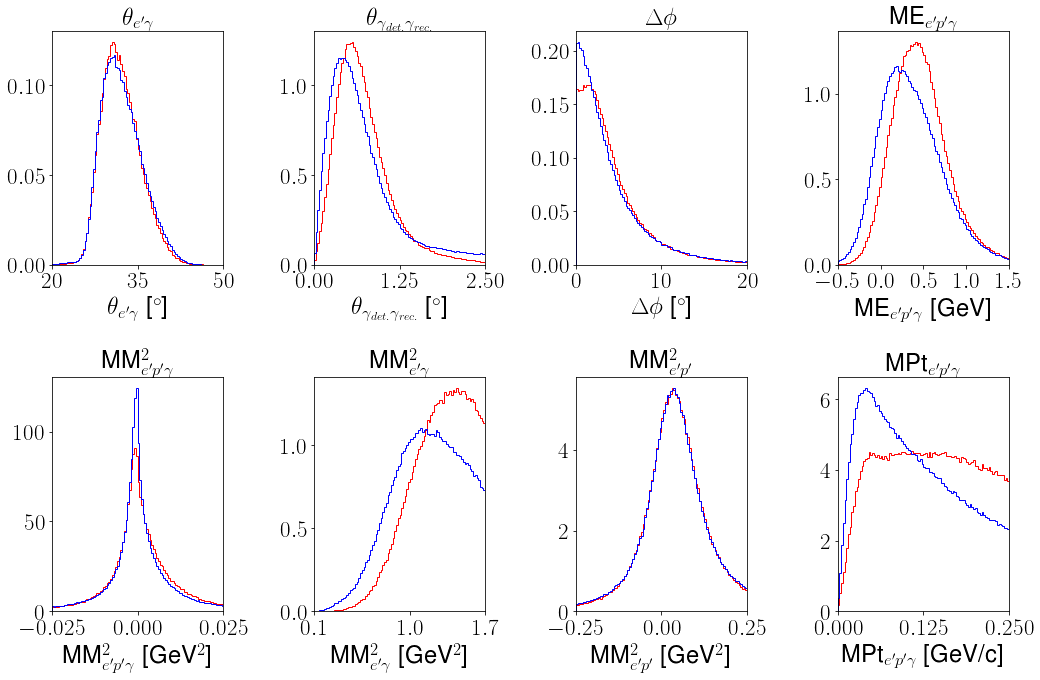

<Figure size 432x288 with 0 Axes>

In [30]:
drawExcl(df_dvcs, pi02epg)

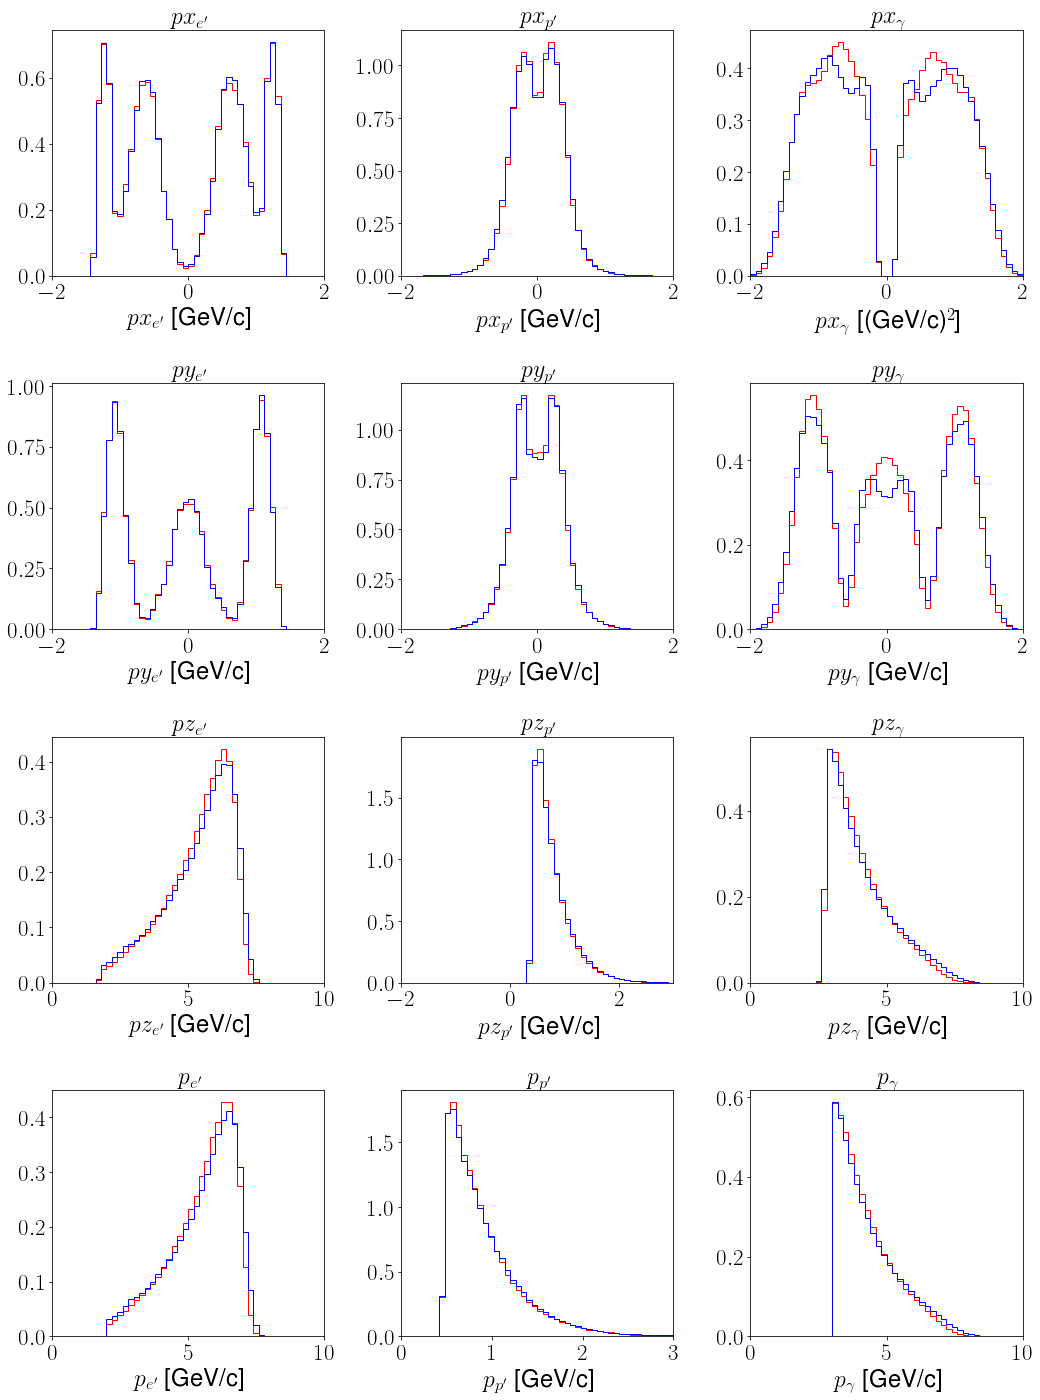

<Figure size 432x288 with 0 Axes>

In [31]:
drawCartesian(df_dvcs, pi02epg)

In [21]:
def drawKine(sim1, sim2, exp=None, save = None):
    varstoplot = ["nu", "W", "Q2", "xB", "t2", "phi2"]
    title = [r"$\nu$", r"$W$", r"$Q^{2}$", r"$x_{B}$", r"$-t$", r"$\phi_{trento}$"]
    unit = [GeV, GeV, GeVc2, None, GeV2, degree]
    binstarts = [2, 2, 1, 0, 0, 0]
    binends = [9, 4, 10, 1, 1.7, 360]
    fig, axs = plt.subplots(2, 3, figsize = (15, 10))
    for xind in range(0,3):
        for yind in range(0, 2):
            ind =xind+3*yind
            start = binstarts[ind]
            end = binends[ind]
            bins = np.linspace(start, end, 51)
            axs[yind, xind].hist(sim1[varstoplot[ind]], bins = bins, density = True, histtype='stepfilled', facecolor='none', edgecolor='r')
            axs[yind, xind].hist(sim2[varstoplot[ind]], bins = bins, density = True, histtype='stepfilled', facecolor='none', edgecolor='b')
            if exp is not None:
                axs[yind, xind].hist(exp[varstoplot[ind]], bins = bins, density = True, histtype='stepfilled', facecolor='none', edgecolor='k')
            axs[yind, xind].set_title(title[ind])
            axs[yind, xind].set_xlim([start, end])
            if (unit[ind]):
                axs[yind, xind].set_xlabel(title[ind]+" [" + unit[ind] +"]")
            else:
                axs[yind, xind].set_xlabel(title[ind])
    axs[0, 0].set_xticks([2, 4, 6, 8, 9])
    axs[0, 2].set_xticks([1, 4, 7, 10])
    axs[1, 1].set_xticks([0, 1, 1.7])
    axs[1, 2].set_xticks(np.linspace(0, 360, 7))
    
    plt.tight_layout()
    if save:
        plt.savefig(save)
    else:
        plt.show()
    plt.clf()

In [22]:
def drawExcl(sim1, sim2, exp=None, save = None):
    varstoplot = ["coneAngle", "reconGam", "coplanarity", "ME_epg", "MM2_epg", "MM2_eg", "MM2_ep", "MPt"]
    title = [r"$\theta_{e'\gamma}$", r"$\theta_{\gamma_{det.}\gamma_{rec.}}$", r"$\Delta\phi$" , "ME"+r"${}_{e'p'\gamma}$", "MM"+r"${}^{2}_{e'p'\gamma}$", "MM"+r"${}^{2}_{e'\gamma}$", "MM"+r"${}^{2}_{e'p'}$", "MPt"+r"${}_{e'p'\gamma}$"]
    unit = [degree, degree, degree, GeV, GeV2, GeV2, GeV2, GeVc]
    binstarts = [20, 0, 0, -0.5, -0.025, 0.1,-0.25 , 0]
    binends = [50, 2.5, 20, 1.5, 0.025, 1.7, 0.25, 0.25]
    fig, axs = plt.subplots(2, 4, figsize = (15,10))
    for yind in range(0, 2):
        for xind in range(0,4):
            ind = 4*yind + xind
            start = binstarts[ind]
            end = binends[ind]
            bins = np.linspace(start, end, 101)
            axs[yind, xind].hist(sim1[varstoplot[ind]], bins = bins, density = True, histtype='stepfilled', facecolor='none', edgecolor='r')
            axs[yind, xind].hist(sim2[varstoplot[ind]], bins = bins, density = True, histtype='stepfilled', facecolor='none', edgecolor='b')
            if exp is not None:
                axs[yind, xind].hist(exp[varstoplot[ind]], bins = bins, density = True, histtype='stepfilled', facecolor='none', edgecolor='k')
            axs[yind, xind].set_title(title[ind])
            axs[yind, xind].set_xlabel(title[ind]+" [" + unit[ind] +"]")
            axs[yind, xind].set_xlim([start, end])
    axs[0, 0].set_xticks([20, 35, 50])
    axs[0, 1].set_xticks([0, 1.25, 2.5])
    axs[0, 3].set_xticks([-0.5, 0, 0.5, 1, 1.5])
    axs[1, 1].set_xticks([0.1, 1, 1.7])
    axs[1, 3].set_xticks([0, 0.125, 0.25])
    plt.tight_layout()
    if save:
        plt.savefig(save)
    else:
        plt.show()
    plt.clf()

In [23]:
def drawVertex(sim1, sim2, exp=None, save = None):
    varstoplot = ["Evx", "Evy", "Evz", "Etheta", "Ptheta", "Gtheta", "Ephi", "Gphi", "Gphi"]
    title = [r"$vx_{e'}$", r"$vy_{e'}$", r"$vz_{e'}$", r"$\theta_{e'}$", r"$\theta_{p'}$", r"$\theta_{\gamma}$", r"$\phi_{e'}$", r"$\phi_{p'}$", r"$\phi_{\gamma}$" ]
    unit = ["cm", "cm", "cm", degree, degree, degree, degree, degree, degree]
    binstarts = [-0.2, -1, -6, 0, 0, 0, -180, -180, -180]
    binends = [0.2, 1, 0, 45, 45, 45, 180, 180, 180]
    fig, axs = plt.subplots(3, 3, figsize = (15,15))
    for xind in range(0,3):
        for yind in range(0, 3):
            ind =xind+3*yind
            start = binstarts[ind]
            end = binends[ind]
            bins = np.linspace(start, end, 51)
            axs[yind, xind].hist(sim1[varstoplot[ind]], bins = bins, density = True, histtype='stepfilled', facecolor='none', edgecolor='r')
            axs[yind, xind].hist(sim2[varstoplot[ind]], bins = bins, density = True, histtype='stepfilled', facecolor='none', edgecolor='b')
            if exp is not None:
                axs[yind, xind].hist(exp[varstoplot[ind]], bins = bins, density = True, histtype='stepfilled', facecolor='none', edgecolor='k')
            axs[yind, xind].set_title(title[ind])
            axs[yind, xind].set_xlim([start, end])
            if (unit[ind]):
                axs[yind, xind].set_xlabel(title[ind]+" [" + unit[ind] +"]")
            else:
                axs[yind, xind].set_xlabel(title[ind])
    for i in range(3):
        axs[1, i].set_xticks([0, 15, 30, 45])
    for i in range(3):
        axs[2, i].set_xticks(np.linspace(-180, 180, 5))
    plt.tight_layout()
    if save:
        plt.savefig(save)
    else:
        plt.show()
    plt.clf()

In [24]:
def drawCartesian(sim1, sim2, exp=None, save = None):
    varstoplot = ["Epx", "Ppx", "Gpx", "Epy", "Ppy", "Gpy", "Epz", "Ppz", "Gpz", "Ep", "Pp", "Gp"]
    title = [r"$px_{e'}$", r"$px_{p'}$", r"$px_{\gamma}$", r"$py_{e'}$", r"$py_{p'}$", r"$py_{\gamma}$", r"$pz_{e'}$", r"$pz_{p'}$", r"$pz_{\gamma}$", r"$p_{e'}$", r"$p_{p'}$", "$p_{\gamma}$"]
    unit = [GeVc, GeVc, GeVc2, GeVc, GeVc, GeVc, GeVc, GeVc, GeVc, GeVc, GeVc, GeVc]
    binstarts = [-2, -2, -2, -2, -2, -2, 0, -2, 0, 0, 0, 0]
    binends = [2, 2, 2, 2, 2, 2, 10, 3, 10, 10, 3, 10]
    fig, axs = plt.subplots(4, 3, figsize = (15,20))
    for xind in range(0,3):
        for yind in range(0, 4):
            ind =xind+3*yind
            start = binstarts[ind]
            end = binends[ind]
            bins = np.linspace(start, end, 51)
            axs[yind, xind].hist(sim1[varstoplot[ind]], bins = bins, density = True, histtype='stepfilled', facecolor='none', edgecolor='r')
            axs[yind, xind].hist(sim2[varstoplot[ind]], bins = bins, density = True, histtype='stepfilled', facecolor='none', edgecolor='b')
            if exp is not None:
                axs[yind, xind].hist(exp[varstoplot[ind]], bins = bins, density = True, histtype='stepfilled', facecolor='none', edgecolor='k')
            axs[yind, xind].set_title(title[ind])
            axs[yind, xind].set_xlim([start, end])
            if (unit[ind]):
                axs[yind, xind].set_xlabel(title[ind]+" [" + unit[ind] +"]")
            else:
                axs[yind, xind].set_xlabel(title[ind])
    plt.tight_layout()
    if save:
        plt.savefig(save)
    else:
        plt.show()
    plt.clf()

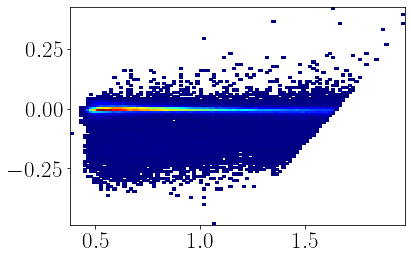

In [110]:
plt.hist2d(dvcs_rec_entire.Pp, dvcs_rec_entire.Pp-dvcs_rec_entire.GenPp, bins = 101, cmin = 1, cmap = cmap)
plt.show()

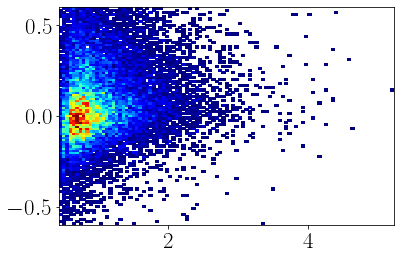

In [118]:
sector = 6
plt.hist2d(expDvcsInb[expDvcsInb.Psector==sector].Pp, expDvcsInb[expDvcsInb.Psector==sector].MM2_ep, bins = 101, cmin = 1, cmap = cmap)
plt.show()

In [72]:
# bh =   [1.8475392809474710*10**(-2),  1.7145175936640097*10**(-2),  1.5265841414860903*10**(-2),  1.3173090093335369*10**(-2),  1.1131387456582377*10**(-2),  9.2970749262339825*10**(-3),  7.7341170882306602*10**(-3),  6.4471593656737474*10**(-3),  5.4106932055266671*10**(-3),  4.5882195108259295*10**(-3),  3.9426831364099213*10**(-3),  3.4412066863488419*10**(-3),  3.0566472719972329*10**(-3),  2.7676342394053139*10**(-3),  2.5579908830927630*10**(-3),  2.4160168311374059*10**(-3),  2.3338422632623937*10**(-3),  2.3069424680418897*10**(-3),  2.3338422393357388*10**(-3),  2.4160166397005048*10**(-3),  2.5579909081333610*10**(-3),  2.7676342541844601*10**(-3),  3.0566468289295917*10**(-3),  3.4412071063545935*10**(-3),  3.9426835465259215*10**(-3),  4.5882190963878675*10**(-3),  5.4106931501926390*10**(-3),  6.4471589116281485*10**(-3),  7.7341162366855046*10**(-3),  9.2970740546124662*10**(-3),  1.1131385613722105*10**(-2),  1.3173088090484441*10**(-2),  1.5265839399700836*10**(-2),  1.7145173892958009*10**(-2),  1.8475392507581800*10**(-2),  1.8959095088131633*10**(-2)]
bh = [0.03524 ,0.03172 ,0.02700 ,0.02210 ,0.01767 ,0.01397 ,0.01104 ,0.00878 ,0.00706 ,0.00577 ,0.00479 ,0.00406 ,0.00352 ,0.00312 ,0.00284 ,0.00265 ,0.00254 ,0.00251 ,0.00254 ,0.00265 ,0.00284 ,0.00312 ,0.00352 ,0.00406 ,0.00479 ,0.00577 ,0.00706 ,0.00878 ,0.01104 ,0.01397 ,0.01767 ,0.02210 ,0.02700 ,0.03172 ,0.03524 ,0.03657]

dvcs_A =[0.04830 ,0.04331 ,0.03669 ,0.02989 ,0.02382 ,0.01886 ,0.01500 ,0.01208 ,0.00990 ,0.00829 ,0.00710 ,0.00622 ,0.00557 ,0.00510 ,0.00476 ,0.00454 ,0.00441 ,0.00437 ,0.00441 ,0.00454 ,0.00476 ,0.00510 ,0.00557 ,0.00622 ,0.00710 ,0.00829 ,0.00990 ,0.01208 ,0.01500 ,0.01886 ,0.02382 ,0.02989 ,0.03669 ,0.04331 ,0.04830 ,0.05017]
dvcs_B = [0.05115 ,0.04626 ,0.03975 ,0.03304 ,0.02704 ,0.02210 ,0.01822 ,0.01525 ,0.01302 ,0.01133 ,0.01006 ,0.00910 ,0.00838 ,0.00784 ,0.00745 ,0.00719 ,0.00704 ,0.00699 ,0.00704 ,0.00719 ,0.00745 ,0.00784 ,0.00838 ,0.00910 ,0.01006 ,0.01133 ,0.01302 ,0.01525 ,0.01822 ,0.02210 ,0.02704 ,0.03304 ,0.03975 ,0.04626 ,0.05115 ,0.05299]
dvcs_C = [0.04899 ,0.04407 ,0.03752 ,0.03079 ,0.02478 ,0.01985 ,0.01600 ,0.01308 ,0.01089 ,0.00926 ,0.00805 ,0.00715 ,0.00648 ,0.00598 ,0.00563 ,0.00539 ,0.00526 ,0.00521 ,0.00526 ,0.00539 ,0.00563 ,0.00598 ,0.00648 ,0.00715 ,0.00805 ,0.00926 ,0.01089 ,0.01308 ,0.01600 ,0.01985 ,0.02478 ,0.03079 ,0.03752 ,0.04407 ,0.04899 ,0.05084]
dvcs_D = [0.03525 ,0.03291 ,0.02973 ,0.02635 ,0.02317 ,0.02041 ,0.01810 ,0.01620 ,0.01465 ,0.01339 ,0.01237 ,0.01154 ,0.01087 ,0.01035 ,0.00996 ,0.00969 ,0.00953 ,0.00947 ,0.00953 ,0.00969 ,0.00996 ,0.01035 ,0.01087 ,0.01154 ,0.01237 ,0.01339 ,0.01465 ,0.01620 ,0.01810 ,0.02041 ,0.02317 ,0.02635 ,0.02973 ,0.03291 ,0.03525 ,0.03612]
dvcs_E = [0.03304 ,0.03067 ,0.02746 ,0.02405 ,0.02088 ,0.01813 ,0.01585 ,0.01400 ,0.01250 ,0.01130 ,0.01033 ,0.00956 ,0.00895 ,0.00847 ,0.00812 ,0.00787 ,0.00772 ,0.00768 ,0.00772 ,0.00787 ,0.00812 ,0.00847 ,0.00895 ,0.00956 ,0.01033 ,0.01130 ,0.01250 ,0.01400 ,0.01585 ,0.01813 ,0.02088 ,0.02405 ,0.02746 ,0.03067 ,0.03304 ,0.03392]
dvcs_VGG = [0.02669 ,0.02716 ,0.02761 ,0.02778 ,0.02759 ,0.02703 ,0.02622 ,0.02524 ,0.02419 ,0.02313 ,0.02213 ,0.02121 ,0.02040 ,0.01972 ,0.01919 ,0.01880 ,0.01856 ,0.01848 ,0.01856 ,0.01880 ,0.01919 ,0.01972 ,0.02040 ,0.02121 ,0.02213 ,0.02313 ,0.02419 ,0.02524 ,0.02622 ,0.02703 ,0.02759 ,0.02778 ,0.02761 ,0.02716 ,0.02669 ,0.02649]
# dvcs = [0.02626 ,0.02668 ,0.02706 ,0.02718 ,0.02693 ,0.02634 ,0.02550 ,0.02452 ,0.02347 ,0.02243 ,0.02144 ,0.02053 ,0.01974 ,0.01908 ,0.01855 ,0.01817 ,0.01794 ,0.01786 ,0.01794 ,0.01817 ,0.01855 ,0.01908 ,0.01974 ,0.02053 ,0.02144 ,0.02243 ,0.02347 ,0.02452 ,0.02550 ,0.02634 ,0.02693 ,0.02718 ,0.02706 ,0.02668 ,0.02626 ,0.02608]
bhphi = [10*i+10 for i in range(36)]

In [5]:
clas6 = [[22.8571,	0.351119], [36.5714,	0.265609], [50.2857,	0.132194], [66.2857,	0.0811131], [82.2857,	0.070548], [97.1429,	0.0592553], [110.857,	0.0448245], [126.857,	0.0294915], [141.714,	0.0208057], [157.714,	0.0284804], [171.429,	0.0208057], [187.429,	0.0168761], [201.143,	0.0187382], [217.143,	0.0284804], [232,	0.0231013], [246.857,	0.0418034], [261.714,	0.0480638], [276.571,	0.0552617], [292.571,	0.107227], [307.429,	0.132194], [321.143,	0.200923], [336,	0.376494]]
clas6bh = [0.49870,0.37800,0.26766,0.18842,0.13525,0.09976,0.07567,0.05897,0.04716,0.03865,0.03244,0.02787,0.02450,0.02205,0.02031,0.01915,0.01848,0.01826,0.01848,0.01915,0.02031,0.02205,0.02450,0.02787,0.03244,0.03865,0.04716,0.05897,0.07567,0.09976,0.13525,0.18842,0.26766,0.37800,0.49870,0.55734]
x, y = np.transpose(clas6)

In [36]:
def dfInOneBin(df):
    binQ2lower = df["Q2"] > 2.2
    binQ2upper = df["Q2"] < 2.7
    binxBlower = df["xB"] > 0.29
    binxBupper = df["xB"] < 0.32
    if "t2" in df.columns:
        bintlower = df["t2"] > 0.3
        bintupper = df["t2"] < 0.39
    else:
        bintlower = df["t"] > 0.3
        bintupper = df["t"] < 0.39
    return df[binQ2lower & binQ2upper &
              binxBlower & binxBupper & bintlower & bintupper]

In [37]:
dvcs_data = dfInOneBin(expDvcsInb)

In [38]:
dvcs_rec = pd.concat([dfInOneBin(df) for df in [job2942_0, job2942_1, job2942_2, job2942_3, job2942_4, job2942_5, job2942_6, job2942_7, job2942_8, job2942_9]])

In [39]:
dvcs_gen = pd.concat([dfInOneBin(df) for df in [job2942_0_gen, job2942_1_gen, job2942_2_gen, job2942_3_gen, job2942_4_gen, job2942_5_gen, job2942_6_gen, job2942_7_gen, job2942_8_gen, job2942_9_gen]])

In [40]:
pi0_data = dfInOneBin(expPi0Inb)

In [41]:
pi02epg_rec = pd.concat([dfInOneBin(df) for df in [pi02epg_0, pi02epg_1, pi02epg_2, pi02epg_3, pi02epg_4, pi02epg_5, pi02epg_6, pi02epg_7, pi02epg_8, pi02epg_9, pi02epg_10, pi02epg_11, pi02epg_12, pi02epg_13, pi02epg_14]])

In [44]:
pi02epgg_rec = dfInOneBin(pi02epgg)

In [45]:
phi_data = dvcs_data["phi2"]
phi_rec = dvcs_rec["phi2"]
phi_gen = dvcs_gen["phi2"]

In [46]:
phi_pi0data = pi0_data["phi1"]
phi_pi0rec = pi02epgg_rec["phi1"]
phi_bkgrec = pi02epg_rec["phi2"]

In [47]:
cont_inb = len(phi_bkgrec)/len(phi_pi0rec)*len(phi_pi0data)/len(phi_data)
print(cont_inb)

0.35548060821687666


In [56]:
def nphistmean(hist, bins):
    s=0
    for i in range(len(hist)):
        s += hist[i] * ((bins[i] + bins[i+1]) / 2) 
    mean = s / numpy.sum(hist)
    return mean

nu 4.248936166306534
xB 0.3056188332364156
W 2.5304940358408063
t2 0.34278447729081857
Q2 2.4350039342018635
phi2 173.3405040841682


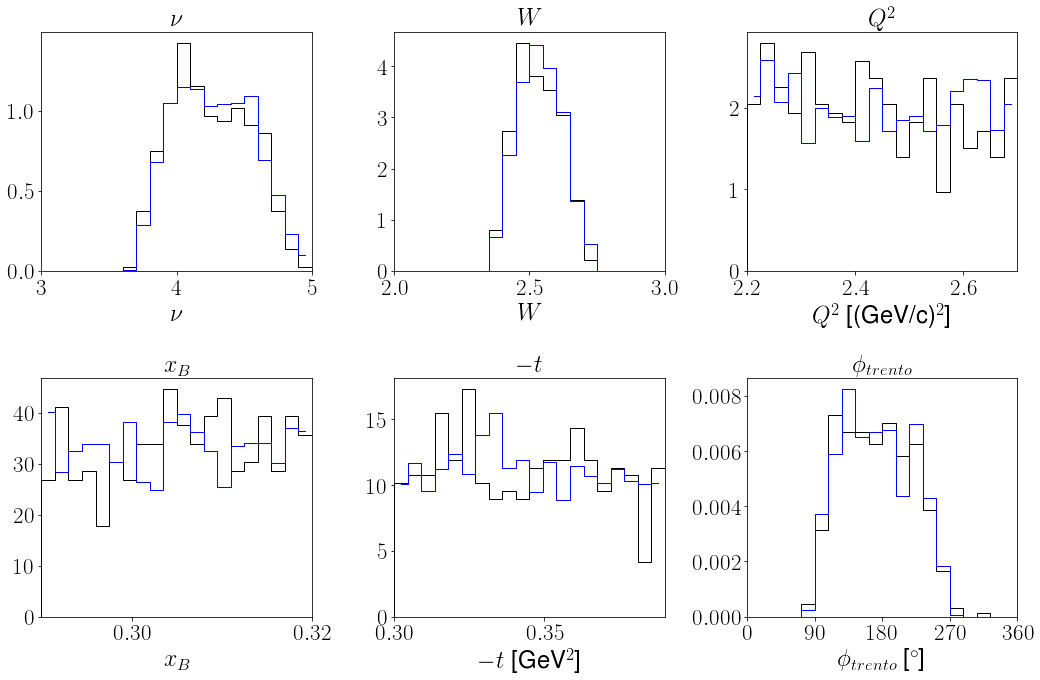

<Figure size 432x288 with 0 Axes>

In [57]:
varstoplot = ["nu", "W", "Q2", "xB", "t2", "phi2"]
title = [r"$\nu$", r"$W$", r"$Q^{2}$", r"$x_{B}$", r"$-t$", r"$\phi_{trento}$" ]
unit = [None, None, GeVc2, None, GeV2, degree, GeV2, degree]
binstarts = [3, 2, 2.2, 0.29, 0.3, 0]
binends = [5, 3, 2.7, 0.32, 0.39, 360]
fig, axs = plt.subplots(2, 3, figsize = (15, 10))
for xind in range(0,3):
    for yind in range(0, 2):
        ind =xind+3*yind
        start = binstarts[ind]
        end = binends[ind]
        bins = np.linspace(start, end, 21)
        simDist_dvpi0, bins = np.histogram(pi02epg_rec[varstoplot[ind]], bins, density = True)
        simDist_dvcs, bins = np.histogram(dvcs_rec[varstoplot[ind]], bins, density = True)
        simDist = cont_inb*simDist_dvpi0 + (1-cont_inb)*simDist_dvcs
        expDist, bin = np.histogram(dvcs_data[varstoplot[ind]], bins, density = True)
        print(varstoplot[ind], nphistmean(expDist - cont_inb*simDist_dvpi0, bins))
        bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
        axs[yind, xind].step(bincenters, simDist, where='mid',color='b', linewidth=1)
        axs[yind, xind].bar(bincenters, simDist, width=np.diff(bins), color = 'w', facecolor='w')
    # 		axs[yind, xind].step(bincenters, cont_inb*simDist_dvpi0, where='mid',color='g', linewidth=1)
    # 		axs[yind, xind].bar(bincenters, cont_inb*simDist_dvpi0, width=np.diff(bins), color = 'w', facecolor='w')
    # 		axs[yind, xind].step(bincenters, (1-cont_inb)*simDist_dvcs, where='mid',color='r', linewidth=1)
    # 		axs[yind, xind].bar(bincenters, (1-cont_inb)*simDist_dvcs, width=np.diff(bins), color = 'w', facecolor='w')
        axs[yind, xind].hist(dvcs_data[varstoplot[ind]], bins = bins, density = True, histtype='stepfilled', facecolor='none', edgecolor='k', linewidth=1)
        axs[yind, xind].set_title(title[ind])
        axs[yind, xind].set_xlim([start, end])
        if (unit[ind]):
            axs[yind, xind].set_xlabel(title[ind]+" [" + unit[ind] +"]")
        else:
            axs[yind, xind].set_xlabel(title[ind])
# axs[1,1].set_xticks([0, 1, 1.7])
axs[1,2].set_xticks([0, 90, 180, 270, 360])
plt.tight_layout()
plt.show()
# plt.savefig("analysisnote/inbending1.pdf")
plt.clf()

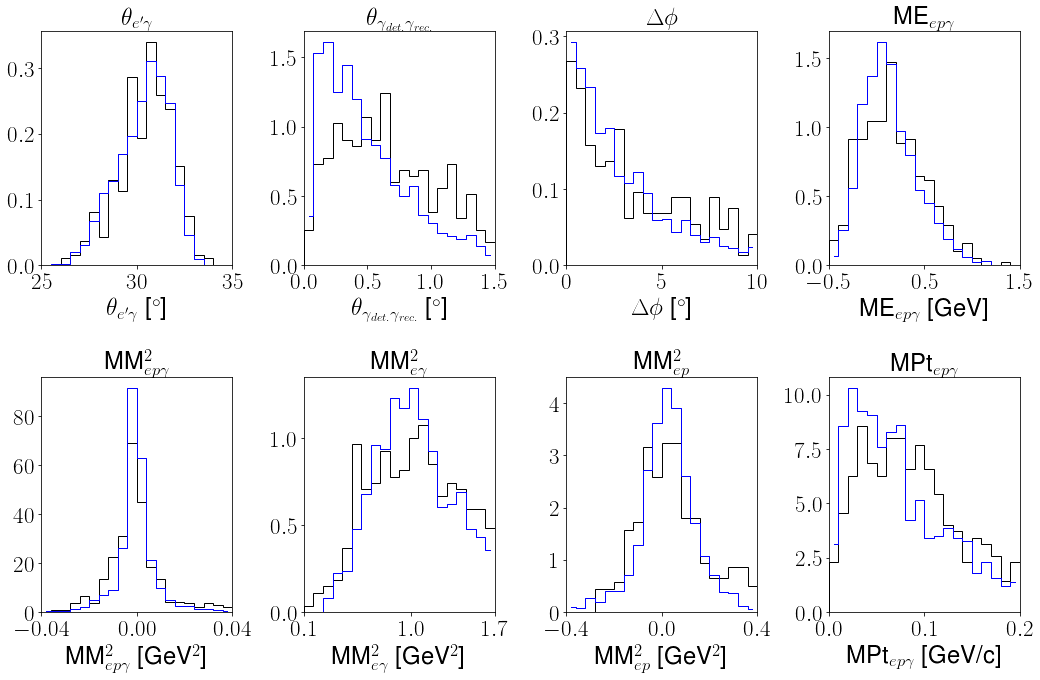

<Figure size 432x288 with 0 Axes>

In [23]:
varstoplot = ["coneAngle", "reconGam", "coplanarity", "ME_epg", "MM2_epg", "MM2_eg", "MM2_ep", "MPt"]
title = [r"$\theta_{e'\gamma}$", r"$\theta_{\gamma_{det.}\gamma_{rec.}}$", r"$\Delta\phi$" , "ME"+r"${}_{ep\gamma}$", "MM"+r"${}^{2}_{ep\gamma}$", "MM"+r"${}^{2}_{e\gamma}$", "MM"+r"${}^{2}_{ep}$", "MPt"+r"${}_{ep\gamma}$"]
unit = [degree, degree, degree, GeV, GeV2, GeV2, GeV2, GeVc]
binstarts = [25, 0, 0, -0.5, -0.04, 0.1,-0.4 , 0]
binends = [35, 1.5, 10, 1.5, 0.04, 1.7, 0.4, 0.2]
fig, axs = plt.subplots(2, 4, figsize = (15,10))
for yind in range(0, 2):
	for xind in range(0,4):
		ind = 4*yind + xind
		start = binstarts[ind]
		end = binends[ind]
		bins = np.linspace(start, end, 21)
		simDist_dvpi0, bins = np.histogram(pi02epg_rec[varstoplot[ind]], bins, density = True)
		simDist_dvcs, bins = np.histogram(dvcs_rec[varstoplot[ind]], bins, density = True)
		simDist = cont_inb*simDist_dvpi0 + (1-cont_inb)*simDist_dvcs
		bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
		axs[yind, xind].step(bincenters, simDist, where='mid',color='b', linewidth=1)
# 		axs[yind, xind].step(bincenters, cont_inb*simDist_dvpi0, where='mid',color='g', linewidth=1)
# 		axs[yind, xind].step(bincenters, (1-cont_inb)*simDist_dvcs, where='mid',color='r', linewidth=1)
		axs[yind, xind].hist(dvcs_data[varstoplot[ind]], bins = bins, density = True, histtype='stepfilled', facecolor='none', edgecolor='k', linewidth=1)
		axs[yind, xind].set_title(title[ind])
		axs[yind, xind].set_xlim([start, end])
		if (unit[ind]):
			axs[yind, xind].set_xlabel(title[ind]+" [" + unit[ind] +"]")
		else:
			axs[yind, xind].set_xlabel(title[ind])
plt.tight_layout()
axs[0,1].set_xticks([0, 0.5, 1, 1.5])
axs[0, -1].set_xticks([-0.5, 0.5, 1.5])
axs[1, 0].set_xticks([-0.04, 0, 0.04])
axs[1, 1].set_xticks([0.1, 1, 1.7])
axs[1, 2].set_xticks([-0.4, 0, 0.4])

plt.show()
# plt.savefig("analysisnote/inbending2.pdf")
plt.clf()

In [48]:
phi_edges = np.linspace(0, 360, 21)
phiData_entries, bins = np.histogram(phi_data, bins=phi_edges)
phiRec_entries, bins = np.histogram(phi_rec, bins=phi_edges)
phiGen_entries, bins = np.histogram(phi_gen, bins=phi_edges)
phiBkg_entries, bins = np.histogram(phi_bkgrec, bins = phi_edges, density=True)
phiBkg_entries = phiBkg_entries * cont_inb * np.sum(phiData_entries) * np.diff(phi_edges)
binscenters = np.array([0.5 * (bins[i] + bins[i + 1])
                        for i in range(len(bins) - 1)])

In [49]:
dvcs_data

,Epx,Epy,Epz,Evx,Evy,Evz,Esector,RunNum,beamQ,liveTime,...,phi1,phi2,MM2_epg,ME_epg,MM2_ep,MM2_eg,MPt,coneAngle,reconGam,coplanarity
8959,-1.198830,0.153751,6.271529,-0.066549,-0.678540,-0.815441,4,5038,53612.972656,0.948000,...,172.619563,177.425776,-0.001334,-0.198791,-0.026514,0.577041,0.112508,31.792028,0.704201,4.806214
11199,-1.176703,-0.167685,6.471374,0.006747,-0.013186,-0.909838,4,5038,117377.773438,0.956000,...,142.576971,142.266868,-0.005365,-0.367954,0.023454,0.336991,0.177349,31.156394,0.790931,0.310103
18152,-0.679948,0.974797,6.415769,-0.289192,-0.260641,-3.403523,3,5038,313787.406250,0.994000,...,238.956338,239.480190,0.002501,0.310013,0.035301,1.295111,0.094039,29.789971,0.262230,0.523852
21687,-1.134372,-0.366425,5.668861,0.069869,-0.210640,-6.147113,4,5039,20537.986328,0.964386,...,91.665495,108.082711,0.085717,0.937284,0.530623,2.137475,0.122982,27.344869,1.879154,16.417217
27237,1.180331,0.040980,6.010770,0.008431,-0.369016,-1.897434,1,5040,79706.718750,-1.000000,...,117.908538,123.561452,-0.002864,0.391397,-0.008954,1.445453,0.117954,28.939856,0.636036,5.652914
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1321500,-0.658210,-1.025495,6.202250,-1.112999,0.645425,-0.936496,5,5407,85289.523438,0.951185,...,222.532546,209.688751,0.009695,0.363546,0.267376,1.329735,0.020515,31.272002,1.654957,12.843794
1325944,-0.688476,0.966863,6.702115,1.980519,1.279229,-3.810891,3,5407,226653.078125,0.954245,...,230.526325,216.817236,0.002746,0.385918,0.089322,1.399353,0.098423,31.717101,1.361278,13.709089
1330217,-0.784683,0.897976,6.328292,-0.122009,-0.245440,-2.811918,3,5407,361858.062500,0.959345,...,110.773204,119.449908,-0.003393,0.027990,0.422702,0.962709,0.064120,29.465782,0.868949,8.676704
1331882,0.624845,-1.037774,6.227692,0.200511,0.011048,-4.701390,6,5407,417564.531250,0.952655,...,192.118947,192.271995,0.004613,-0.301641,-0.069372,0.444540,0.124420,32.145558,0.285325,0.153048


[0.         0.         0.         0.         1.22373275 0.37293662
 0.2588486  0.25375144 0.24268544 0.23641516 0.22740461 0.28216009
 0.26411089 0.35417056 0.53160833 0.         0.         0.
 0.         0.        ]


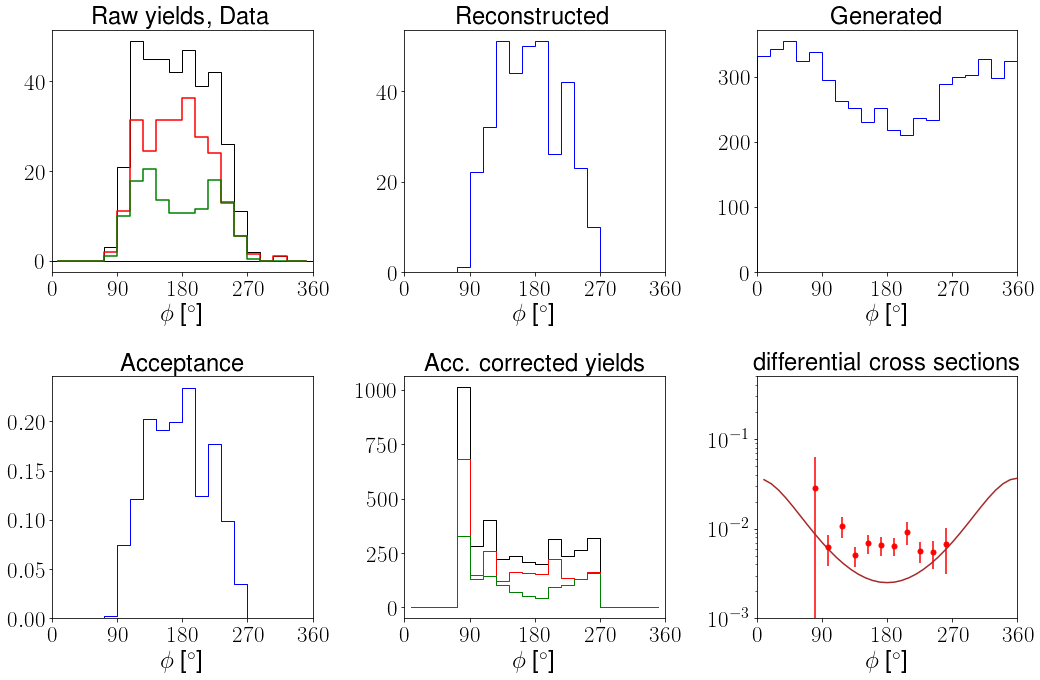

In [64]:
fig, axs = plt.subplots(2, 3, figsize = (15,10))
axs[0,0].hist(phi_data, bins= phi_edges, histtype='stepfilled', facecolor='none', edgecolor='k')
axs[0,0].step(binscenters, phiData_entries-phiBkg_entries, where='mid', color='r')
axs[0,0].step(binscenters, phiBkg_entries, where='mid', color='g')
axs[0,0].set_title("Raw yields, Data")
axs[0,1].hist(phi_rec, bins= phi_edges, histtype='stepfilled', facecolor='none', edgecolor='b')
axs[0,1].set_title("Reconstructed")
axs[0,2].hist(phi_gen, bins= phi_edges, histtype='stepfilled', facecolor='none', edgecolor='b')
axs[0,2].set_title("Generated")
acc = phiRec_entries/phiGen_entries
axs[1,0].step(binscenters, phiRec_entries/phiGen_entries, where='mid',color='b', linewidth=1)
axs[1,0].bar(binscenters, phiRec_entries/phiGen_entries, width=np.diff(bins), color = 'w', facecolor='w')
axs[1,0].set_title("Acceptance")
accCorrectedData = copy(acc)
accCorrectedSig = copy(acc)
errSig = copy(acc)
accCorrectedBkg = copy(acc)
for ind, val in enumerate(acc):
    if val ==0:
        accCorrectedData[ind] = 0
        accCorrectedSig[ind] = 0
        accCorrectedBkg[ind] = 0
        errSig[ind] = 0
    else:
        accCorrectedData[ind] = phiData_entries[ind]/val
        accCorrectedSig[ind] = (phiData_entries[ind]-phiBkg_entries[ind])/val
        accCorrectedBkg[ind] = phiBkg_entries[ind]/val
        errSig[ind] =np.sqrt(1/(phiData_entries[ind]-phiBkg_entries[ind])+1/(phiRec_entries[ind])+1/(phiGen_entries[ind]))
axs[1,1].step(binscenters, accCorrectedData, where='mid',color='k', linewidth=1)
axs[1,1].step(binscenters, accCorrectedSig, where='mid', color='r', linewidth=1)
axs[1,1].step(binscenters, accCorrectedBkg, where='mid', color='g', linewidth=1)

print(errSig)
axs[1,1].set_title("Acc. corrected yields")
# axs[1,2].scatter(binscenters, accCorrectedData/56.5/0.03/0.5/0.09/(np.pi*2/20)/10**6,color='k')#, linewidth=1)
axs[1,2].errorbar(binscenters, accCorrectedSig/56.5/0.03/0.5/0.09/(np.pi*2/20)/10**6, yerr = accCorrectedSig/56.5/0.03/0.5/0.09/(np.pi*2/20)/10**6*errSig, color='r', fmt='.', markersize=10)
# axs[1,2].scatter(binscenters, accCorrectedBkg/56.5/0.03/0.5/0.09/(np.pi*2/20)/10**6, color='g')#, linewidth=1)
axs[1,2].set_title("differential cross sections")
axs[1,2].set_yscale('log', base=10)
axs[1,2].set_ylim([0.001, 0.5])
axs[1,2].plot(bhphi, bh, color='brown')
# axs[1,2].plot(bhphi, dvcs, color='magenta')

for ax in axs.reshape(6,):
    ax.set_xlim([0, 360])
    ax.set_xticks(np.linspace(0, 360, 5))
    ax.set_xlabel("$\phi$"+" ["+r"${}^{\circ}$"+"]")
plt.tight_layout()
plt.show()

#     binQ2lower = df["Q2"] > 2.2
#     binQ2upper = df["Q2"] < 2.7
#     binxBlower = df["xB"] > 0.3
#     binxBupper = df["xB"] < 0.38
#     bintlower = df["t2"] > 0.3
#     bintupper = df["t2"] < 0.39


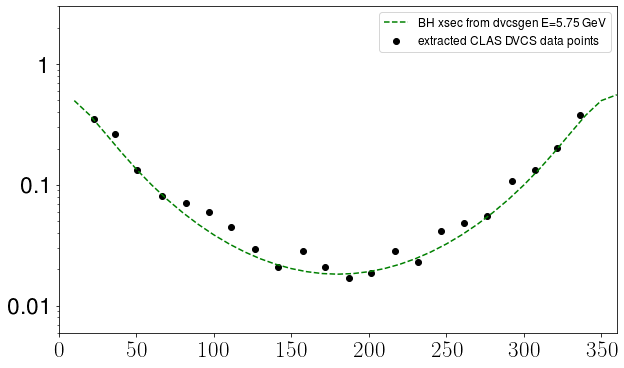

In [65]:
fig, ax = plt.subplots(1,1, figsize=(10,6))
ax.scatter(x, y, color = 'black', label = "extracted CLAS DVCS data points")
ax.plot(bhphi, clas6bh, color = 'green', linestyle='--', label = "BH xsec from dvcsgen E=5.75 GeV")
ax.set_yscale('log', base=10)
ax.set_ylim(0.006, 3)
ax.legend(loc='upper right')
ax.set_yticks([0.01, 0.1, 1])
ax.set_yticklabels([0.01, 0.1, 1])
ax.set_xlim([0, 360])
plt.show()

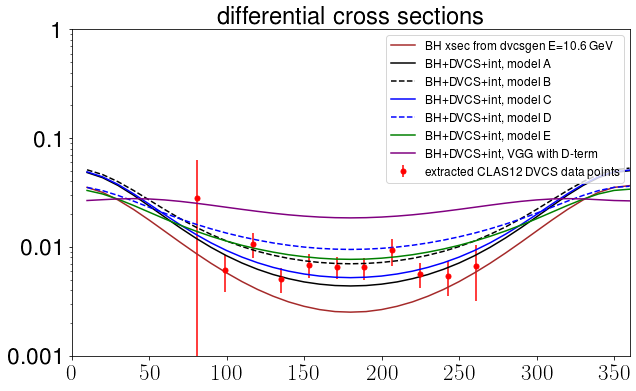

In [89]:
fig, ax = plt.subplots(1,1, figsize=(10,6))
ax.errorbar(binscenters, accCorrectedSig/56.5/0.03/0.5/0.09/(np.pi*2/20)/10**6, yerr = accCorrectedSig/56.5/0.03/0.5/0.09/(np.pi*2/20)/10**6*errSig, color='r', fmt='.', markersize=10, label="extracted CLAS12 DVCS data points")
ax.set_title("differential cross sections")
ax.set_yscale('log', base=10)
ax.set_ylim([0.001, 0.5])
ax.plot(bhphi, bh, color='brown', label = "BH xsec from dvcsgen E=10.6 GeV")
ax.plot(bhphi, dvcs_A, color='k', label = "BH+DVCS+int, model A")
ax.plot(bhphi, dvcs_B, color='k', linestyle='--', label = "BH+DVCS+int, model B")
ax.plot(bhphi, dvcs_C, color='b', label = "BH+DVCS+int, model C")
ax.plot(bhphi, dvcs_D, color='b', linestyle='--', label = "BH+DVCS+int, model D")
ax.plot(bhphi, dvcs_E, color='g', label = "BH+DVCS+int, model E")
ax.plot(bhphi, dvcs_VGG, color='purple', label = "BH+DVCS+int, VGG with D-term")
# ax.scatter(x, y, color = 'black', label = "extracted CLAS DVCS data points")
# ax.plot(bhphi, clas6bh, color = 'green', linestyle='--', label = "BH xsec from dvcsgen E=5.75 GeV")
ax.legend(loc='upper right')
ax.set_yticks([0.001, 0.01, 0.1, 1])
ax.set_yticklabels([0.001, 0.01, 0.1, 1])
ax.set_xlim([0, 360])
plt.show()

In [28]:
dvcs_rec.columns

Index(['Epx', 'Epy', 'Epz', 'Esector', 'event', 'Ppx', 'Ppy', 'Ppz', 'Psector',
       'Pp', 'Ptheta', 'Pphi', 'Pe', 'Gpx', 'Gpy', 'Gpz', 'Gsector', 'GIndex',
       'Ep', 'Ee', 'Etheta', 'Ephi', 'Gp', 'Ge', 'Gtheta', 'Gphi', 'Mpx',
       'Mpy', 'Mpz', 'Q2', 'nu', 'y', 'xB', 't1', 't2', 'W', 'phi1', 'phi2',
       'MM2_epg', 'ME_epg', 'MM2_ep', 'MM2_eg', 'MPt', 'coneAngle', 'reconGam',
       'coplanarity', 'GenEpx', 'GenEpy', 'GenEpz', 'GenEp', 'GenEtheta',
       'GenEphi', 'GenPpx', 'GenPpy', 'GenPpz', 'GenPp', 'GenPtheta',
       'GenPphi', 'GenGpx', 'GenGpy', 'GenGpz', 'GenGp', 'GenGtheta',
       'GenGphi'],
      dtype='object')

In [20]:
sim = pi02epgg
VGS = [-sim.GenEpx, -sim.GenEpy, 10.604 - sim.GenEpz]
VGS2 = [sim.GenPpx + sim.GenGpx, sim.GenPp + sim.GenGpy, sim.GenPpz + sim.GenGpz]
ele = [sim.GenEpx, sim.GenEpy, sim.GenEpz]
pro = [sim.GenPpx, sim.GenPpy, sim.GenPpz]
gam = [sim.GenGpx, sim.GenGpy, sim.GenGpz]
GenEe = getEnergy(ele, 0.000511)
GenPe = getEnergy(pro, 0.93827)
GenQ2 = -((ebeam - GenEe)**2 - mag2(VGS))
GenNu = (ebeam - GenEe)
GenY = GenNu/ebeam
GenxB = GenQ2 / 2.0 / M / GenNu
GenT = 2 * M * (GenPe - M)
costheta = cosTheta(VGS, gam)
GenT2 =  (M * GenQ2 + 2 * M * GenNu * (GenNu - np.sqrt(GenNu * GenNu + GenQ2) * costheta))\
        / (M + GenNu - np.sqrt(GenNu * GenNu + GenQ2) * costheta)

v3l = cross(beam, ele)
v3h = cross(pro, VGS)
v3g = cross(VGS, gam)
GenPhi = angle(v3l, v3h)
sim.loc[:, "GenQ2"] = GenQ2
sim.loc[:, "GenxB"] = GenxB
sim.loc[:, "GenT1"] = GenT
sim.loc[:, "GenT2"] = GenT2
sim.loc[:, "GenPhi1"] = np.where(dot(v3l, pro) > 0, 360.0 - GenPhi, GenPhi)
GenPhi2 = angle(v3l, v3g)
sim.loc[:, "GenPhi2"] = np.where(dot(v3l, gam) < 0, 360.0 - GenPhi2, GenPhi2)

GenW = np.sqrt(np.maximum(0, M*M + 2*M*GenNu-GenQ2))

In [9]:
sim.loc[:, ["GenxB", "GenQ2", "GenT2", "GenPhi1"]]

,GenxB,GenQ2,GenT2,GenPhi1
0,0.346198,4.245616,0.383671,194.145106
1,0.390832,2.102693,0.283208,215.412762
2,0.366206,2.804337,0.302664,124.836111
3,0.316338,4.400053,0.346247,139.838559
4,0.369244,2.618563,0.377062,87.356001
...,...,...,...,...
2624982,0.386256,2.553527,0.361567,268.520800
2624983,0.349123,2.731537,0.722953,216.822241
2624984,0.300993,3.163597,0.385465,210.675911
2624985,0.306740,2.108258,0.177077,241.285314


In [10]:
sim.loc[:, ["GenEp", "GenGp", "GenPp"]]

,GenEp,GenGp,GenPp
0,6.623751,3.713035,0.756707
1,5.906609,4.352111,0.875911
2,2.740530,7.368787,1.083078
3,5.148446,5.307557,0.547394
4,6.438089,3.771988,0.945809
...,...,...,...
10100,4.674174,5.677399,0.733040
10101,6.231926,4.242918,0.508922
10102,6.892347,3.283622,0.993334
10103,6.891943,3.527948,0.615968


In [92]:
def gauss(x, *p):
    A, mu, sigma = p
    return A*np.exp(-(x-mu)**2/(2.*sigma**2))

In [93]:
def lorentz(x, *p):
    I0, gamma, E0 = p
    return I0*((gamma**2)/(((x-E0)**2)+gamma**2))


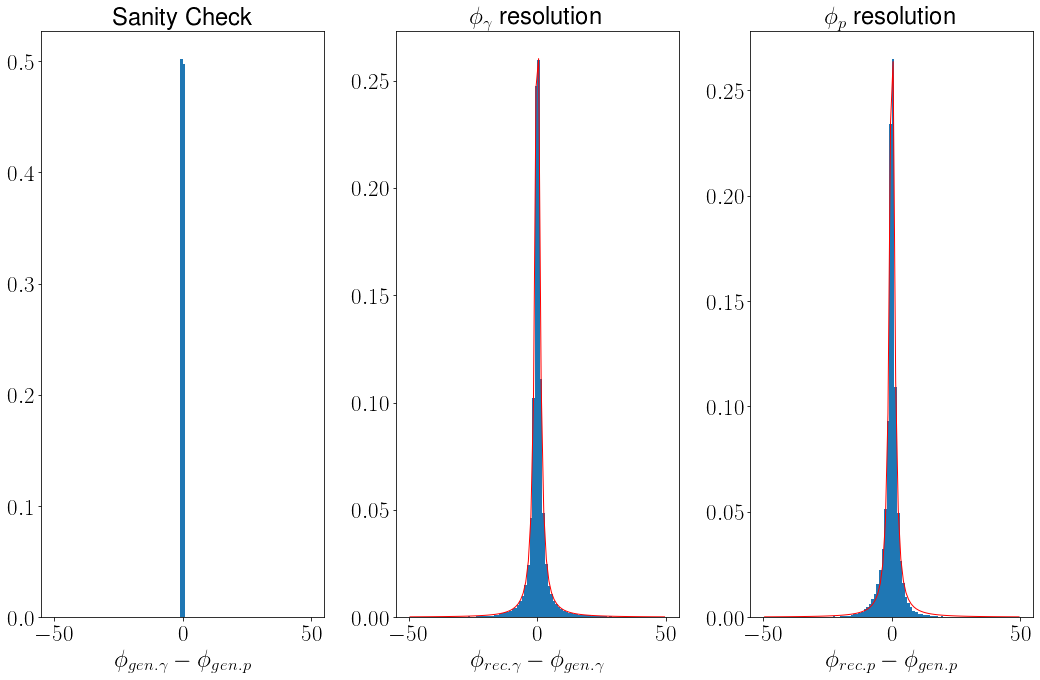

[0.30872592 1.07324114 0.0366932 ]


In [13]:
binedges = np.linspace(-50, 50, 101)
data_entries, bins = np.histogram(sim.phi2-sim.GenPhi2, bins=binedges, density=True)
binscenters = np.array([0.5 * (bins[i] + bins[i + 1])
                        for i in range(len(bins) - 1)])
popt_g, pcov_g = curve_fit(
    gauss, xdata=binscenters, ydata=data_entries, p0=[
        0.3, 0, 4])

popt_g2, pcov_g2 = curve_fit(
    lorentz, xdata=binscenters, ydata=data_entries, p0=[
        0.3, 1, 4])

data_entries, bins = np.histogram(sim.phi1-sim.GenPhi1, bins=binedges, density=True)
binscenters = np.array([0.5 * (bins[i] + bins[i + 1])
                        for i in range(len(bins) - 1)])
popt_p, pcov_p = curve_fit(
    gauss, xdata=binscenters, ydata=data_entries, p0=[
        0.3, 0, 4])

popt_p2, pcov_p2 = curve_fit(
    lorentz, xdata=binscenters, ydata=data_entries, p0=[
        0.3, 1, 4])


fig, axs = plt.subplots(1, 3, figsize = (15,10))
axs[0].hist(sim.GenPhi2-sim.GenPhi1, density=True, bins = binedges)
axs[0].set_title("Sanity Check")
axs[0].set_xlabel(r"$\phi_{gen.\gamma}-\phi_{gen.p}$")

axs[1].hist(sim.phi2-sim.GenPhi2, density=True, bins = binedges)
axs[1].set_title(r"$\phi_{\gamma}$"+" resolution")
# axs[1].plot(binscenters, gauss(binscenters,*popt_g), color='r', linewidth=1.0, label=r'Fitted function')
axs[1].plot(binscenters, lorentz(binscenters,*popt_g2), color='r', linewidth=1.0, label=r'Fitted function')
axs[1].set_xlabel(r"$\phi_{rec.\gamma}-\phi_{gen.\gamma}$")

axs[2].hist(sim.phi1-sim.GenPhi1, density=True, bins = binedges)
axs[2].set_title(r"$\phi_{p}$"+" resolution")
# axs[2].plot(binscenters, gauss(binscenters,*popt_p), color='r', linewidth=1.0, label=r'Fitted function')
axs[2].plot(binscenters, lorentz(binscenters,*popt_p2), color='r', linewidth=1.0, label=r'Fitted function')
axs[2].set_xlabel(r"$\phi_{rec.p}-\phi_{gen.p}$")

plt.tight_layout()
plt.show()
print(popt_g2)

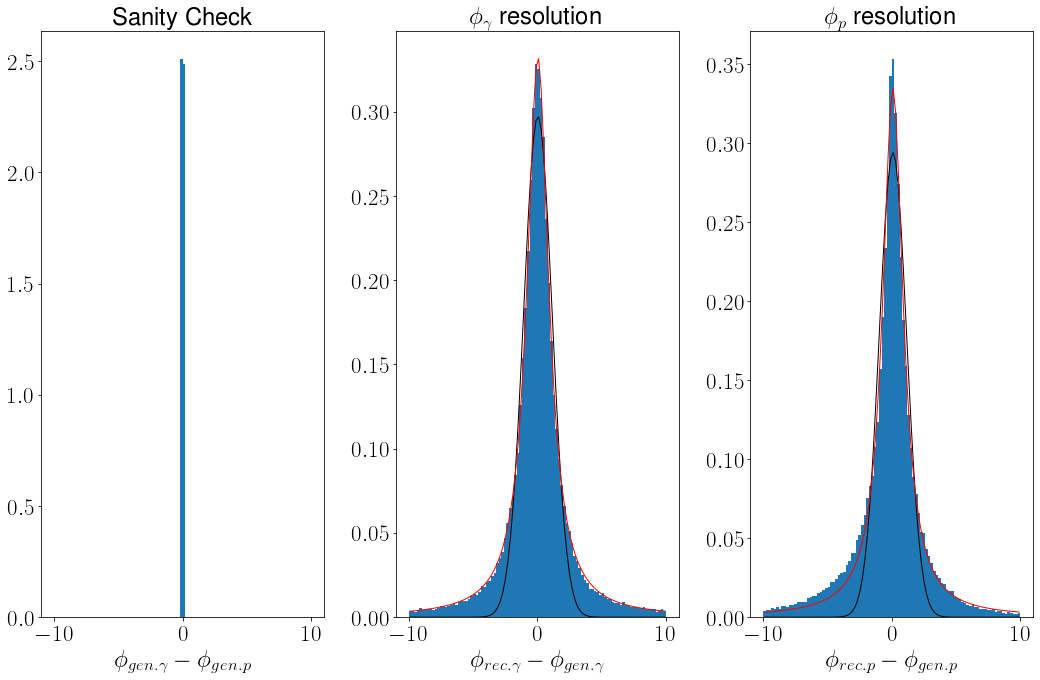

In [14]:
binedges = np.linspace(-10, 10, 101)
data_entries, bins = np.histogram(sim.phi2-sim.GenPhi2, bins=binedges, density=True)
binscenters = np.array([0.5 * (bins[i] + bins[i + 1])
                        for i in range(len(bins) - 1)])
popt_g, pcov_g = curve_fit(
    gauss, xdata=binscenters, ydata=data_entries, p0=[
        0.3, 0, 4])

popt_g2, pcov_g2 = curve_fit(
    lorentz, xdata=binscenters, ydata=data_entries, p0=[
        0.3, 1, 4])

data_entries, bins = np.histogram(sim.phi1-sim.GenPhi1, bins=binedges, density=True)
binscenters = np.array([0.5 * (bins[i] + bins[i + 1])
                        for i in range(len(bins) - 1)])
popt_p, pcov_p = curve_fit(
    gauss, xdata=binscenters, ydata=data_entries, p0=[
        0.3, 0, 4])

popt_p2, pcov_p2 = curve_fit(
    lorentz, xdata=binscenters, ydata=data_entries, p0=[
        0.3, 1, 4])


fig, axs = plt.subplots(1, 3, figsize = (15,10))
axs[0].hist(sim.GenPhi2-sim.GenPhi1, density=True, bins = binedges)
axs[0].set_title("Sanity Check")
axs[0].set_xlabel(r"$\phi_{gen.\gamma}-\phi_{gen.p}$")

axs[1].hist(sim.phi2-sim.GenPhi2, density=True, bins = binedges)
axs[1].set_title(r"$\phi_{\gamma}$"+" resolution")
axs[1].plot(binscenters, gauss(binscenters,*popt_g), color='k', linewidth=1.0, label=r'Fitted function')
axs[1].plot(binscenters, lorentz(binscenters,*popt_g2), color='r', linewidth=1.0, label=r'Fitted function')
axs[1].set_xlabel(r"$\phi_{rec.\gamma}-\phi_{gen.\gamma}$")

axs[2].hist(sim.phi1-sim.GenPhi1, density=True, bins = binedges)
axs[2].set_title(r"$\phi_{p}$"+" resolution")
axs[2].plot(binscenters, gauss(binscenters,*popt_p), color='k', linewidth=1.0, label=r'Fitted function')
axs[2].plot(binscenters, lorentz(binscenters,*popt_p2), color='r', linewidth=1.0, label=r'Fitted function')
axs[2].set_xlabel(r"$\phi_{rec.p}-\phi_{gen.p}$")

plt.tight_layout()
plt.show()

In [25]:
E1cm = (sim.W)/2.0 + (sim.Q2/2.0/sim.W) + (M*M)/2.0/sim.W
P1cm = np.sqrt(E1cm * E1cm - M*M)
E3cm = (sim.W*sim.W - 0 + M*M)/2/sim.W
P3cm = np.sqrt(E3cm*E3cm - M*M)

In [53]:
qmod = np.sqrt(sim.nu*sim.nu+sim.Q2)
E1cm = M*(M + sim.nu)/sim.W
P1cm = M*qmod/sim.W
E2cm = (sim.W**2 + M**2)/(2*sim.W)
P2cm = (sim.W**2 - M**2)/(2*sim.W)
del2max = 2*(M**2 - E1cm*E2cm - P1cm*P2cm)
del2min = 2*(M**2 - E1cm*E2cm + P1cm*P2cm)

In [55]:
sim.loc[:, "tmin"] = sim.Q2*sim.Q2/4/sim.W/sim.W - (P1cm-P3cm)**2
sim.loc[:, "tprime"] = sim.t2-sim.tmin

In [61]:
sim.loc[:, "nt"] = np.select([sim.tprime<=0.2, (0.2<sim.tprime)&(sim.tprime<=0.4), (0.4<sim.tprime)&(sim.tprime<=0.8), sim.tprime>0.8], [0, 1, 2, 3])

In [68]:
sim.loc[:, "offset"] = 0
sim.loc[:, "bin"] = -1

In [73]:
sim.loc[ (sim.Q2<=1.8) & (sim.xB<0.13), "offset" ] = 0
sim.loc[ (sim.Q2<=1.8) & (sim.xB<0.21) & (sim.xB>=0.13), "offset"] = 1
sim.loc[ (sim.Q2<=1.8) & (sim.xB>=0.21), "offset"] = 2
sim.loc[ (sim.Q2>1.8) & (sim.Q2<=2.4) & (sim.xB<0.16), "offset" ] = 12
sim.loc[ (sim.Q2>1.8) & (sim.Q2<=2.4) & (sim.xB<0.26) & (sim.xB>=0.16), "offset" ] = 13
sim.loc[ (sim.Q2>1.8) & (sim.Q2<=2.4) & (sim.xB>=0.26), "offset" ] = 14
sim.loc[ (sim.Q2>2.4) & (sim.Q2<=3.25) & (sim.xB<0.21), "offset" ] = 24
sim.loc[ (sim.Q2>2.4) & (sim.Q2<=3.25) & (sim.xB<0.33) & (sim.xB>=0.21), "offset" ] = 25
sim.loc[ (sim.Q2>2.4) & (sim.Q2<=3.25) & (sim.xB>=0.33), "offset" ] = 26
sim.loc[ (sim.Q2>3.25) & (sim.Q2<=4) & (sim.xB<0.33), "offset" ] = 36
sim.loc[ (sim.Q2>3.25) & (sim.Q2<=4) & (sim.xB>=0.33), "offset" ] = 37
sim.loc[ (sim.Q2>5) & (sim.xB<0.55), "offset" ] = 44
sim.loc[ (sim.Q2>5) & (sim.xB>=0.55), "offset" ] = 45

In [75]:
sim.loc[:, "factor"] = np.where(sim.Q2<=3.25, 3, 2)

In [78]:
sim.bin = sim.factor * sim.nt + sim.offset

In [91]:
sim.bin.max()

51

In [237]:
for i in range(52):
    phidiff1 = sim.loc[sim.bin==i, "phi1"] - sim.loc[sim.bin==i, "GenPhi1"]
    phidiff2 = sim.loc[sim.bin==i, "phi2"] - sim.loc[sim.bin==i, "GenPhi2"]
    if len(phidiff2)>100:

        
        bins_small = np.linspace(-10, 10, 21)
        plot_small = np.linspace(-10, 10, 1001)
        plot_large = np.linspace(-50, 50, 1001)
        bins_large = np.linspace(-360, 360, 31)
        binscenters_small = np.array([0.5 * (bins_small[i] + bins_small[i + 1])
                                for i in range(len(bins_small) - 1)])
        binscenters_large = np.array([0.5 * (bins_large[i] + bins_large[i + 1])
                                for i in range(len(bins_large) - 1)])
        
        data_entries, bins = np.histogram(phidiff2, bins=bins_small)
        popt_g, pcov_g = curve_fit(
            gauss, xdata=binscenters_small, ydata=data_entries, p0=[
                np.max(data_entries), 0, 1])

        popt_g2, pcov_g2 = curve_fit(
            lorentz, xdata=binscenters_small, ydata=data_entries, p0=[
                np.max(data_entries), 1, 0])

        bins_chi2 = np.linspace(-5, 5, 11)
        data_entries, bins = np.histogram(phidiff2, bins=bins_chi2)        
        binscenters_chi2 = np.array([0.5 * (bins_chi2[i] + bins_chi2[i + 1])
                                for i in range(len(bins_chi2) - 1)])
        chi2_g = np.sum((gauss(binscenters_chi2, *popt_g)-data_entries)**2/data_entries)/(10-3)
        chi2_g2 = np.sum((lorentz(binscenters_chi2, *popt_g2)-data_entries)**2/data_entries)/(10-3)

#         data_entries, bins = np.histogram(phidiff2, bins=bins_large)
#         popt_g3, pcov_g3 = curve_fit(
#             gauss, xdata=binscenters_large, ydata=data_entries, p0=[
#                 0.3, 0, 1])

#         popt_g4, pcov_g4 = curve_fit(
#             lorentz, xdata=binscenters_large, ydata=data_entries, p0=[
#                 0.3, 1, 0])
        
        data_entries, bins = np.histogram(phidiff1, bins=bins_small)
        popt_p, pcov_p = curve_fit(
            gauss, xdata=binscenters_small, ydata=data_entries, p0=[
                np.max(data_entries), 0, 4])

        
        popt_p2, pcov_p2 = curve_fit(
            lorentz, xdata=binscenters_small, ydata=data_entries, p0=[
                np.max(data_entries), 1, 4])


        
        bins_chi2 = np.linspace(-5, 5, 11)
        data_entries, bins = np.histogram(phidiff1, bins=bins_chi2)        
        binscenters_chi2 = np.array([0.5 * (bins_chi2[i] + bins_chi2[i + 1])
                                for i in range(len(bins_chi2) - 1)])
        chi2_p = np.sum((gauss(binscenters_chi2, *popt_p)-data_entries)**2/data_entries)/(10-3)
        chi2_p2 = np.sum((lorentz(binscenters_chi2, *popt_p2)-data_entries)**2/data_entries)/(10-3)

#         data_entries, bins = np.histogram(phidiff1, bins=bins_large)
#         popt_p3, pcov_p3 = curve_fit(
#             gauss, xdata=binscenters_large, ydata=data_entries, p0=[
#                 0.3, 0, 1])
        
#         popt_p4, pcov_p4 = curve_fit(
#             lorentz, xdata=binscenters_large, ydata=data_entries, p0=[
#                 0.3, 1, 0])
        print("{}\t{:1.3f}\t{:1.3f}\t{:1.3f}\t{:1.3f}".format(i, popt_g[2], 2*popt_g2[1], popt_p[2], 2*np.abs(popt_p2[1])))

#         fig, axs = plt.subplots(2, 2, figsize = (15,10))
#         axs[0, 0].hist(phidiff2, bins = bins_small)
#         axs[0, 0].set_title(r"$\phi_{\gamma}$"+" resolution")
#         axs[0, 0].plot(plot_small, gauss(plot_small,*popt_g), color='k', linewidth=2.0, label='Gaussian '+r'$\sigma$='+'{:1.3f}\n'.format(popt_g[2])+r'$\chi^2_{red.}$'+'={:.3f}'.format(chi2_g))
#         axs[0, 0].plot(plot_small, lorentz(plot_small,*popt_g2), color='r', linewidth=2.0, label='Lorentzian '+r'$2\gamma$='+'{:.3f}\n'.format(2*popt_g2[1]) +r'$\chi^2_{red.}$'+'={:.3f}'.format(chi2_g2))
#         axs[0, 0].set_xlabel(r"$\phi_{rec.\gamma}-\phi_{gen.\gamma}$")

#         patch = axs[0, 0].add_patch(matplotlib.patches.Rectangle((5, 10000), 0, 0, alpha=0.5,facecolor='none',label='raw std dev {:.3f}'.format(phidiff2.std())))
#         axs[0, 0].legend(loc='upper right')

#         axs[0, 1].hist(phidiff2, bins = bins_large)
#         axs[0, 1].set_title(r"$\phi_{\gamma}$"+" resolution")
# #         axs[0, 1].plot(plot_large, gauss(plot_large,*popt_g), color='k', linewidth=1.0, label='Gaussian '+r'$\sigma$='+'{:1.3f}\n'.format(popt_g[2])+r'$\chi^2_{red.}$'+'={:.3f}'.format(chi2_g))
# #         axs[0, 1].plot(plot_large, lorentz(plot_large,*popt_g2), color='r', linewidth=1.0, label='Lorentzian '+r'$2\gamma$='+'{:1.3f}'.format(2*popt_g2[1]))
#         axs[0, 1].set_xlabel(r"$\phi_{rec.\gamma}-\phi_{gen.\gamma}$")
# #         axs[0, 1].legend(loc='upper right')

        
#         axs[1, 0].hist(phidiff1, bins = bins_small)
#         axs[1, 0].set_title(r"$\phi_{p}$"+" resolution")
#         axs[1, 0].plot(plot_small, gauss(plot_small,*popt_p), color='k', linewidth=2.0, label='Gaussian '+r'$\sigma$='+'{:1.3f}\n'.format(popt_p[2])+r'$\chi^2_{red.}$'+'={:.3f}'.format(chi2_p))
#         axs[1, 0].plot(plot_small, lorentz(plot_small,*popt_p2), color='r', linewidth=2.0, label='Lorentzian '+r'$2\gamma$='+'{:1.3f}\n'.format(2*popt_p2[1])+r'$\chi^2_{red.}$'+'={:.3f}'.format(chi2_p2))
#         axs[1, 0].set_xlabel(r"$\phi_{rec.p}-\phi_{gen.p}$")
#         axs[1, 0].legend(loc='upper right')

#         patch = axs[1, 0].add_patch(matplotlib.patches.Rectangle((5, 10000), 0, 0, alpha=0.5,facecolor='none',label='raw std dev {:.3f}'.format(phidiff1.std())))
#         axs[1, 0].legend(loc='upper right')

#         axs[1, 1].hist(phidiff1, bins = bins_large)
#         axs[1, 1].set_title(r"$\phi_{p}$"+" resolution")
# #         axs[1, 1].plot(plot_large, gauss(plot_large,*popt_p), color='k', linewidth=1.0, label='Gaussian '+r'$\sigma$='+'{:1.3f}'.format(popt_p[2]))
# #         axs[1, 1].plot(plot_large, lorentz(plot_large,*popt_p2), color='r', linewidth=1.0, label='Lorentzian '+r'$2\gamma$='+'{:1.3f}'.format(2*popt_p2[1]))
#         axs[1, 1].set_xlabel(r"$\phi_{rec.p}-\phi_{gen.p}$")
# #         axs[1, 1].legend(loc='upper right')


#         plt.tight_layout()
# #         plt.show()
#         plt.savefig("bin{}.pdf".format(i))
#         plt.clf()
# #         break
    else:
        print(" {} bin skipped due to lack of statistics".format(i))


 0 bin skipped due to lack of statistics
 1 bin skipped due to lack of statistics
2	2.407	4.553	3.522	6.685
 3 bin skipped due to lack of statistics
4	1.821	3.388	2.118	3.886
5	1.627	2.987	2.275	4.261
6	1.089	1.927	0.967	1.633
7	1.331	2.439	1.714	3.329
8	1.324	2.445	1.241	2.236
 9 bin skipped due to lack of statistics
10	0.863	1.189	0.944	1.599
11	0.884	1.251	0.793	0.973
 12 bin skipped due to lack of statistics
 13 bin skipped due to lack of statistics
 14 bin skipped due to lack of statistics
 15 bin skipped due to lack of statistics
16	1.251	2.211	2.635	4.925
17	1.817	3.419	2.449	4.589
 18 bin skipped due to lack of statistics
19	1.016	1.654	1.459	2.759
20	1.261	2.263	1.340	2.428
21	0.702	0.442	1.871	3.223
22	0.804	0.951	0.842	1.269
23	0.866	1.197	0.786	0.930
 24 bin skipped due to lack of statistics
 25 bin skipped due to lack of statistics
 26 bin skipped due to lack of statistics
 27 bin skipped due to lack of statistics
28	1.498	2.731	2.779	5.238
29	2.640	4.487	3.953	7.427
 30 b

## Elastic Scattering


In [34]:
elas5038 = pd.read_pickle("/Users/sangbaek/Dropbox (MIT)/data/pickles/elas.pkl")
pureelas = elas5038[elas5038.pure]

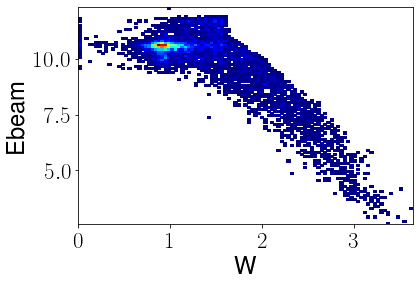

In [35]:
plt.hist2d(elas5038.W, elas5038.rEb, cmin=1, cmap =cmap, bins =101)
plt.xlabel("W")
plt.ylabel("Ebeam")
plt.show()

In [41]:
(elas5038.beamQ.max() - elas5038.beamQ.min())*1.324 *10**33/10**24/10**9

525206.843875

In [148]:
len(sim)

101269